In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# import json

In [2]:
url = "http://localhost:8000/test.html"
option_table = {"page_load_strategy":["normal","eager","none"]}
default_option = ["headless", "--enable-javascript", "--use-gl"]

def edge_test(n=10, backend="wasm", task="vision", op="add", arguments={"page_load_strategy":"normal"}, others=default_option, rev="false", revv="false"):
    option = webdriver.EdgeOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Edge(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start({n}, 10000000, "{backend}", "{op}", {rev}, {revv})')
    driver.quit()
    return data
def chrome_test(n=10, backend="wasm", task="vision", op="add", arguments={"page_load_strategy":"normal"}, others=default_option, rev="false", revv="false"):
    option = webdriver.ChromeOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Chrome(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start({n}, 10000000, backend = "{backend}", op = "{op}", {rev}, {revv})')
    driver.quit()
    return data
def firefox_test(n=10, backend="wasm", task="vision", op="add", arguments={"page_load_strategy":"normal"}, others=["-headless"], rev="false", revv="false"):
    option = webdriver.FirefoxOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Firefox(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start({n}, 10000000, backend = "{backend}", op = "{op}", {rev}, {revv})')
    driver.quit()
    return data

In [3]:
chrome_data = {}
for backend in ["wasm", "cpu"]:
    for op in ["add","sub","mul","div","dot"]:
        for mode in option_table["page_load_strategy"][:-1]:
            for rev in ["false","true"]:
                for revv in ["false", "true"]:
                    for i in tqdm(range(10), f"chrome test with {mode} mode {backend} backend {op} op {rev} rev {revv} revv"):
                        try:
                            result = chrome_test(n = 100, backend = backend, op = op, arguments={"page_load_strategy":mode})
                        except Exception as e:
                            print(e)
                            break
                        if backend+"_"+mode+"_"+op+"_"+rev+"_"+revv not in chrome_data:
                            chrome_data[backend+"_"+mode+"_"+op+"_"+rev+"_"+revv] = []
                        chrome_data[backend+"_"+mode+"_"+op+"_"+rev+"_"+revv] += [result]

chrome test with normal mode wasm backend add op false rev false revv: 100%|██████████| 10/10 [02:42<00:00, 16.25s/it]
chrome test with normal mode wasm backend add op false rev true revv: 100%|██████████| 10/10 [02:35<00:00, 15.56s/it]
chrome test with normal mode wasm backend add op true rev false revv: 100%|██████████| 10/10 [02:40<00:00, 16.04s/it]
chrome test with normal mode wasm backend add op true rev true revv: 100%|██████████| 10/10 [02:32<00:00, 15.29s/it]
chrome test with eager mode wasm backend add op false rev false revv: 100%|██████████| 10/10 [02:26<00:00, 14.62s/it]
chrome test with eager mode wasm backend add op false rev true revv: 100%|██████████| 10/10 [02:26<00:00, 14.69s/it]
chrome test with eager mode wasm backend add op true rev false revv: 100%|██████████| 10/10 [02:26<00:00, 14.65s/it]
chrome test with eager mode wasm backend add op true rev true revv: 100%|██████████| 10/10 [02:26<00:00, 14.65s/it]
chrome test with normal mode wasm backend sub op false rev f

In [4]:
edge_data = {}
for backend in ["wasm", "cpu"]:
    for op in ["add","sub","mul","div","dot"]:
        for mode in option_table["page_load_strategy"][:-1]:
            for rev in ["false","true"]:
                for revv in ["false", "true"]:
                    for i in tqdm(range(10), f"edge test with {mode} mode {backend} backend {op} op {rev} rev {revv} revv"):
                        try:
                            result = edge_test(n = 100, backend = backend, op = op, arguments={"page_load_strategy":mode})
                        except Exception as e:
                            print(e)
                            break
                        if backend+"_"+mode+"_"+op+"_"+rev+"_"+revv not in edge_data:
                            edge_data[backend+"_"+mode+"_"+op+"_"+rev+"_"+revv] = []
                        edge_data[backend+"_"+mode+"_"+op+"_"+rev+"_"+revv] += [result]

edge test with normal mode wasm backend add op false rev false revv: 100%|██████████| 10/10 [02:38<00:00, 15.80s/it]
edge test with normal mode wasm backend add op false rev true revv: 100%|██████████| 10/10 [02:30<00:00, 15.09s/it]
edge test with normal mode wasm backend add op true rev false revv: 100%|██████████| 10/10 [02:30<00:00, 15.06s/it]
edge test with normal mode wasm backend add op true rev true revv: 100%|██████████| 10/10 [02:29<00:00, 14.97s/it]
edge test with eager mode wasm backend add op false rev false revv: 100%|██████████| 10/10 [02:29<00:00, 14.97s/it]
edge test with eager mode wasm backend add op false rev true revv: 100%|██████████| 10/10 [02:31<00:00, 15.12s/it]
edge test with eager mode wasm backend add op true rev false revv: 100%|██████████| 10/10 [02:30<00:00, 15.05s/it]
edge test with eager mode wasm backend add op true rev true revv: 100%|██████████| 10/10 [02:28<00:00, 14.87s/it]
edge test with normal mode wasm backend sub op false rev false revv: 100%|██

In [5]:
firefox_data = {}
for backend in ["wasm", "cpu"]:
    for op in ["add","sub","mul","div","dot"]:
        for mode in option_table["page_load_strategy"][:-1]:
            for rev in ["false","true"]:
                for revv in ["false", "true"]:
                    for i in tqdm(range(10), f"firefox test with {mode} mode {backend} backend {op} op {rev} rev {revv} revv"):
                        try:
                            result = firefox_test(n = 100, backend = backend, op = op, arguments={"page_load_strategy":mode})
                        except Exception as e:
                            print(e)
                            break
                        if backend+"_"+mode+"_"+op+"_"+rev+"_"+revv not in firefox_data:
                            firefox_data[backend+"_"+mode+"_"+op+"_"+rev+"_"+revv] = []
                        firefox_data[backend+"_"+mode+"_"+op+"_"+rev+"_"+revv] += [result]

firefox test with normal mode wasm backend add op false rev false revv: 100%|██████████| 10/10 [03:09<00:00, 18.92s/it]
firefox test with normal mode wasm backend add op false rev true revv: 100%|██████████| 10/10 [03:26<00:00, 20.65s/it]
firefox test with normal mode wasm backend add op true rev false revv: 100%|██████████| 10/10 [03:31<00:00, 21.19s/it]
firefox test with normal mode wasm backend add op true rev true revv: 100%|██████████| 10/10 [03:04<00:00, 18.48s/it]
firefox test with eager mode wasm backend add op false rev false revv: 100%|██████████| 10/10 [03:30<00:00, 21.09s/it]
firefox test with eager mode wasm backend add op false rev true revv: 100%|██████████| 10/10 [03:26<00:00, 20.64s/it]
firefox test with eager mode wasm backend add op true rev false revv: 100%|██████████| 10/10 [03:34<00:00, 21.42s/it]
firefox test with eager mode wasm backend add op true rev true revv: 100%|██████████| 10/10 [03:02<00:00, 18.26s/it]
firefox test with normal mode wasm backend sub op fa

In [6]:
import pickle
with open('15g_chrome.pickle', 'wb') as handle:
    pickle.dump(chrome_data, handle)

with open('15g_edge.pickle', 'wb') as handle:
    pickle.dump(edge_data, handle)
    
with open('15g_firefox.pickle', 'wb') as handle:
    pickle.dump(firefox_data, handle)

In [7]:
with open('pc_chrome.pickle', 'rb') as handle:
    pc_chrome_data = pickle.load(handle)

with open('pc_edge.pickle', 'rb') as handle:
    pc_edge_data = pickle.load(handle)

with open('pc_firefox.pickle', 'rb') as handle:
    pc_firefox_data = pickle.load(handle)

In [9]:
chrome_data_average = {}
for key in chrome_data.keys():
    chrome_data_average[key] = {k:0 for k in chrome_data[key][0].keys()}
    for obj in chrome_data[key]:
        for kk in obj.keys():
            chrome_data_average[key][kk] += np.array(obj[kk])
    for kk in chrome_data[key][0].keys():
        chrome_data_average[key][kk] = chrome_data_average[key][kk]/len(chrome_data[key])

In [10]:
edge_data_average = {}
for key in edge_data.keys():
    edge_data_average[key] = {k:0 for k in edge_data[key][0].keys()}
    for obj in edge_data[key]:
        for kk in obj.keys():
            edge_data_average[key][kk] += np.array(obj[kk])
    for kk in edge_data[key][0].keys():
        edge_data_average[key][kk] = edge_data_average[key][kk]/len(edge_data[key])

In [11]:
firefox_data_average = {}
for key in firefox_data.keys():
    firefox_data_average[key] = {k:0 for k in firefox_data[key][0].keys()}
    for obj in firefox_data[key]:
        for kk in obj.keys():
            firefox_data_average[key][kk] += np.array(obj[kk])
    for kk in firefox_data[key][0].keys():
        firefox_data_average[key][kk] = firefox_data_average[key][kk]/len(firefox_data[key])

In [44]:
pc_chrome_data_average = {}
for key in pc_chrome_data.keys():
    pc_chrome_data_average[key] = {k:0 for k in pc_chrome_data[key][0].keys()}
    for obj in pc_chrome_data[key]:
        for kk in obj.keys():
            pc_chrome_data_average[key][kk] += np.array(obj[kk])
    for kk in pc_chrome_data[key][0].keys():
        pc_chrome_data_average[key][kk] = pc_chrome_data_average[key][kk]/len(pc_chrome_data[key])

In [45]:
pc_edge_data_average = {}
for key in pc_edge_data.keys():
    pc_edge_data_average[key] = {k:0 for k in pc_edge_data[key][0].keys()}
    for obj in pc_edge_data[key]:
        for kk in obj.keys():
            pc_edge_data_average[key][kk] += np.array(obj[kk])
    for kk in pc_edge_data[key][0].keys():
        pc_edge_data_average[key][kk] = pc_edge_data_average[key][kk]/len(pc_edge_data[key])

In [46]:
pc_firefox_data_average = {}
for key in pc_firefox_data.keys():
    pc_firefox_data_average[key] = {k:0 for k in pc_firefox_data[key][0].keys()}
    for obj in pc_firefox_data[key]:
        for kk in obj.keys():
            pc_firefox_data_average[key][kk] += np.array(obj[kk])
    for kk in pc_firefox_data[key][0].keys():
        pc_firefox_data_average[key][kk] = pc_firefox_data_average[key][kk]/len(pc_firefox_data[key])

In [25]:
chrome_data_all = {}
for key in chrome_data.keys():
    chrome_data_all[key] = {k:[] for k in chrome_data[key][0].keys()}
    for obj in chrome_data[key]:
        for kk in obj.keys():
            chrome_data_all[key][kk] += obj[kk][1:]

In [26]:
edge_data_all = {}
for key in edge_data.keys():
    edge_data_all[key] = {k:[] for k in edge_data[key][0].keys()}
    for obj in edge_data[key]:
        for kk in obj.keys():
            edge_data_all[key][kk] += obj[kk][1:]

In [27]:
firefox_data_all = {}
for key in firefox_data.keys():
    firefox_data_all[key] = {k:[] for k in firefox_data[key][0].keys()}
    for obj in firefox_data[key]:
        for kk in obj.keys():
            firefox_data_all[key][kk] += obj[kk][1:]

In [47]:
pc_chrome_data_all = {}
for key in pc_chrome_data.keys():
    pc_chrome_data_all[key] = {k:[] for k in pc_chrome_data[key][0].keys()}
    for obj in pc_chrome_data[key]:
        for kk in obj.keys():
            pc_chrome_data_all[key][kk] += obj[kk][1:]

In [48]:
pc_edge_data_all = {}
for key in pc_edge_data.keys():
    pc_edge_data_all[key] = {k:[] for k in pc_edge_data[key][0].keys()}
    for obj in pc_edge_data[key]:
        for kk in obj.keys():
            pc_edge_data_all[key][kk] += obj[kk][1:]

In [49]:
pc_firefox_data_all = {}
for key in pc_firefox_data.keys():
    pc_firefox_data_all[key] = {k:[] for k in pc_firefox_data[key][0].keys()}
    for obj in pc_firefox_data[key]:
        for kk in obj.keys():
            pc_firefox_data_all[key][kk] += obj[kk][1:]

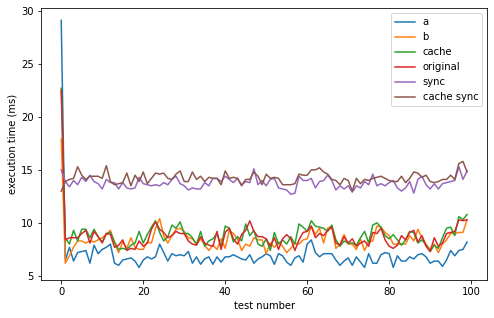

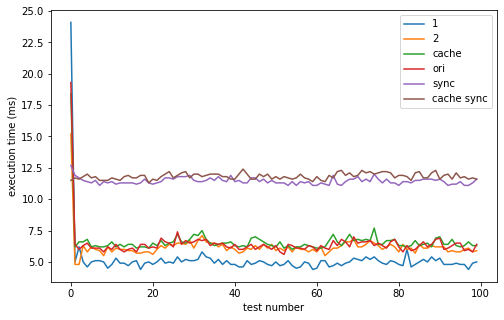

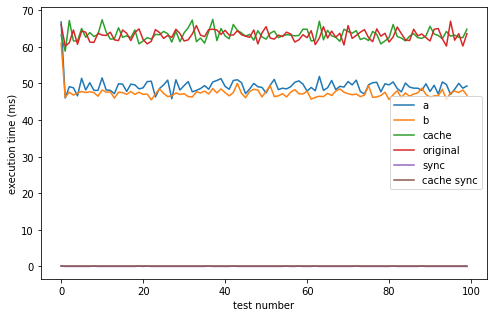

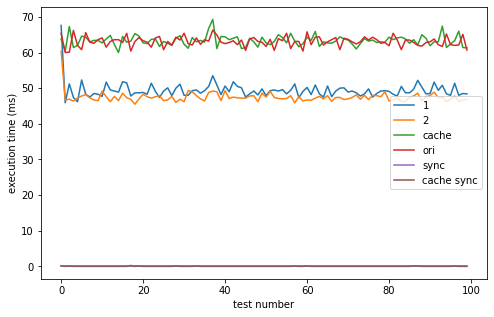

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_false"]["1"])), chrome_data_average["wasm_normal_add_false_false"]["1"], label="a")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_false"]["2"])), chrome_data_average["wasm_normal_add_false_false"]["2"], label="b")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_false"]["cache"])), chrome_data_average["wasm_normal_add_false_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_false"]["ori"])), chrome_data_average["wasm_normal_add_false_false"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_false"]["sync"])), chrome_data_average["wasm_normal_add_false_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_false"]["sync_cache"])), chrome_data_average["wasm_normal_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_false"]["1"])), chrome_data_average["wasm_eager_add_false_false"]["1"], label="1")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_false"]["2"])), chrome_data_average["wasm_eager_add_false_false"]["2"], label="2")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_false"]["cache"])), chrome_data_average["wasm_eager_add_false_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_false"]["ori"])), chrome_data_average["wasm_eager_add_false_false"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_false"]["sync"])), chrome_data_average["wasm_eager_add_false_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_false"]["sync_cache"])), chrome_data_average["wasm_eager_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_false"]["1"])), chrome_data_average["cpu_normal_add_false_false"]["1"], label="a")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_false"]["2"])), chrome_data_average["cpu_normal_add_false_false"]["2"], label="b")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_false"]["cache"])), chrome_data_average["cpu_normal_add_false_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_false"]["ori"])), chrome_data_average["cpu_normal_add_false_false"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_false"]["sync"])), chrome_data_average["cpu_normal_add_false_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_false"]["sync_cache"])), chrome_data_average["cpu_normal_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_false"]["1"])), chrome_data_average["cpu_eager_add_false_false"]["1"], label="1")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_false"]["2"])), chrome_data_average["cpu_eager_add_false_false"]["2"], label="2")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_false"]["cache"])), chrome_data_average["cpu_eager_add_false_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_false"]["ori"])), chrome_data_average["cpu_eager_add_false_false"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_false"]["sync"])), chrome_data_average["cpu_eager_add_false_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_false"]["sync_cache"])), chrome_data_average["cpu_eager_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

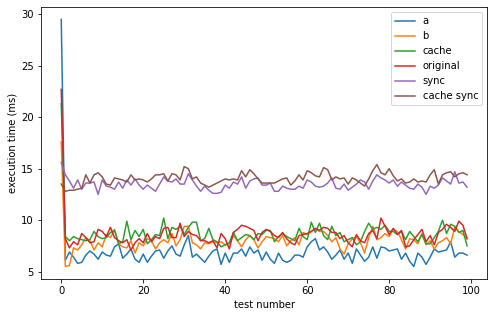

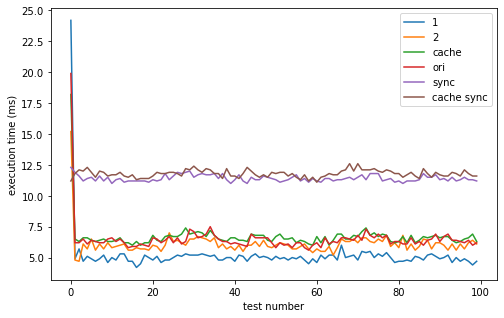

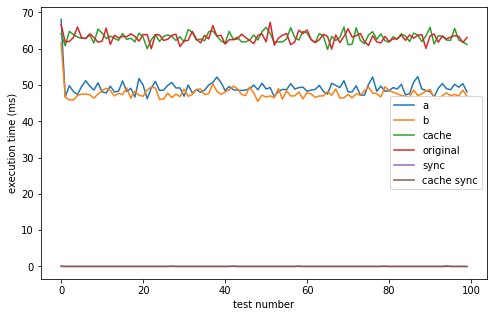

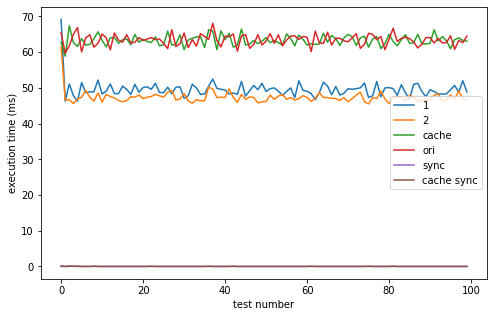

In [13]:
plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_false"]["1"])), chrome_data_average["wasm_normal_add_true_false"]["1"], label="a")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_false"]["2"])), chrome_data_average["wasm_normal_add_true_false"]["2"], label="b")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_false"]["cache"])), chrome_data_average["wasm_normal_add_true_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_false"]["ori"])), chrome_data_average["wasm_normal_add_true_false"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_false"]["sync"])), chrome_data_average["wasm_normal_add_true_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_false"]["sync_cache"])), chrome_data_average["wasm_normal_add_true_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_false"]["1"])), chrome_data_average["wasm_eager_add_true_false"]["1"], label="1")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_false"]["2"])), chrome_data_average["wasm_eager_add_true_false"]["2"], label="2")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_false"]["cache"])), chrome_data_average["wasm_eager_add_true_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_false"]["ori"])), chrome_data_average["wasm_eager_add_true_false"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_false"]["sync"])), chrome_data_average["wasm_eager_add_true_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_false"]["sync_cache"])), chrome_data_average["wasm_eager_add_true_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_false"]["1"])), chrome_data_average["cpu_normal_add_true_false"]["1"], label="a")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_false"]["2"])), chrome_data_average["cpu_normal_add_true_false"]["2"], label="b")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_false"]["cache"])), chrome_data_average["cpu_normal_add_true_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_false"]["ori"])), chrome_data_average["cpu_normal_add_true_false"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_false"]["sync"])), chrome_data_average["cpu_normal_add_true_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_false"]["sync_cache"])), chrome_data_average["cpu_normal_add_true_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_false"]["1"])), chrome_data_average["cpu_eager_add_true_false"]["1"], label="1")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_false"]["2"])), chrome_data_average["cpu_eager_add_true_false"]["2"], label="2")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_false"]["cache"])), chrome_data_average["cpu_eager_add_true_false"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_false"]["ori"])), chrome_data_average["cpu_eager_add_true_false"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_false"]["sync"])), chrome_data_average["cpu_eager_add_true_false"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_false"]["sync_cache"])), chrome_data_average["cpu_eager_add_true_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

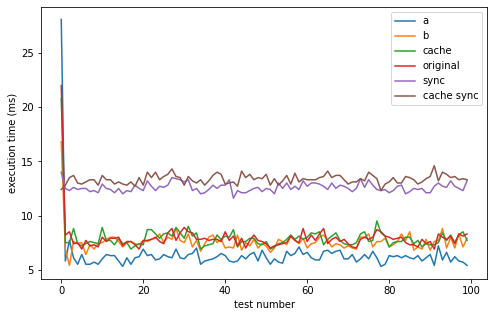

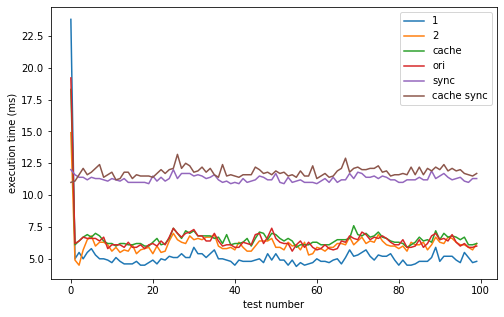

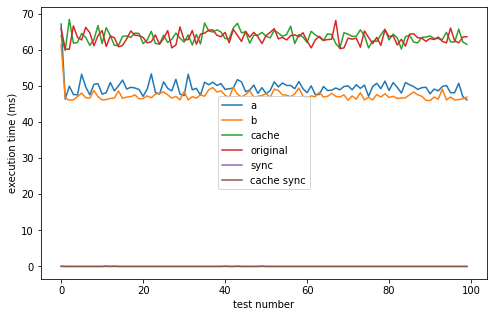

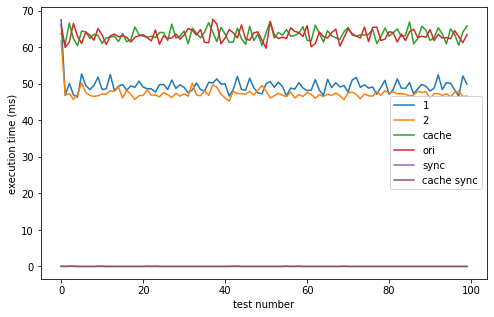

In [14]:
plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_true"]["1"])), chrome_data_average["wasm_normal_add_false_true"]["1"], label="a")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_true"]["2"])), chrome_data_average["wasm_normal_add_false_true"]["2"], label="b")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_true"]["cache"])), chrome_data_average["wasm_normal_add_false_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_true"]["ori"])), chrome_data_average["wasm_normal_add_false_true"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_true"]["sync"])), chrome_data_average["wasm_normal_add_false_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_normal_add_false_true"]["sync_cache"])), chrome_data_average["wasm_normal_add_false_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_true"]["1"])), chrome_data_average["wasm_eager_add_false_true"]["1"], label="1")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_true"]["2"])), chrome_data_average["wasm_eager_add_false_true"]["2"], label="2")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_true"]["cache"])), chrome_data_average["wasm_eager_add_false_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_true"]["ori"])), chrome_data_average["wasm_eager_add_false_true"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_true"]["sync"])), chrome_data_average["wasm_eager_add_false_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_eager_add_false_true"]["sync_cache"])), chrome_data_average["wasm_eager_add_false_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_true"]["1"])), chrome_data_average["cpu_normal_add_false_true"]["1"], label="a")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_true"]["2"])), chrome_data_average["cpu_normal_add_false_true"]["2"], label="b")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_true"]["cache"])), chrome_data_average["cpu_normal_add_false_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_true"]["ori"])), chrome_data_average["cpu_normal_add_false_true"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_true"]["sync"])), chrome_data_average["cpu_normal_add_false_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_normal_add_false_true"]["sync_cache"])), chrome_data_average["cpu_normal_add_false_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_true"]["1"])), chrome_data_average["cpu_eager_add_false_true"]["1"], label="1")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_true"]["2"])), chrome_data_average["cpu_eager_add_false_true"]["2"], label="2")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_true"]["cache"])), chrome_data_average["cpu_eager_add_false_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_true"]["ori"])), chrome_data_average["cpu_eager_add_false_true"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_true"]["sync"])), chrome_data_average["cpu_eager_add_false_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_eager_add_false_true"]["sync_cache"])), chrome_data_average["cpu_eager_add_false_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

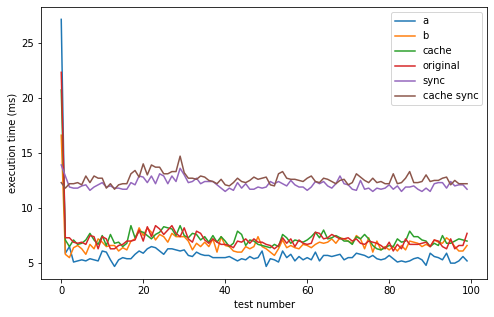

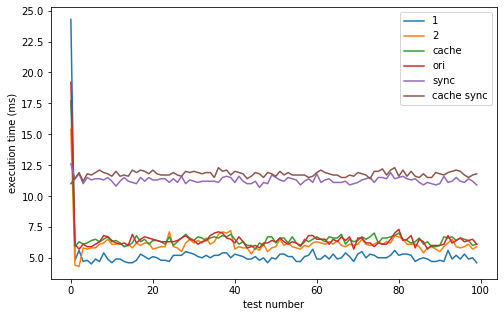

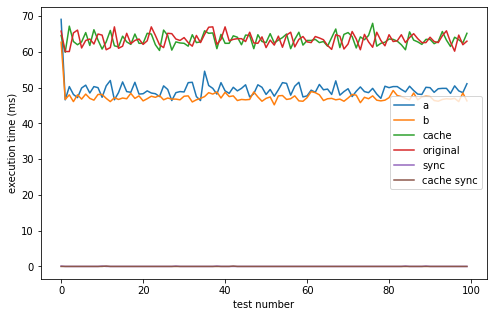

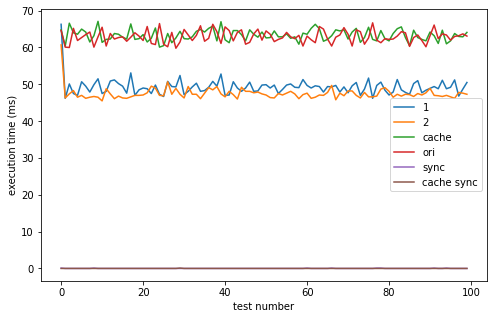

In [15]:
plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_true"]["1"])), chrome_data_average["wasm_normal_add_true_true"]["1"], label="a")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_true"]["2"])), chrome_data_average["wasm_normal_add_true_true"]["2"], label="b")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_true"]["cache"])), chrome_data_average["wasm_normal_add_true_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_true"]["ori"])), chrome_data_average["wasm_normal_add_true_true"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_true"]["sync"])), chrome_data_average["wasm_normal_add_true_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_normal_add_true_true"]["sync_cache"])), chrome_data_average["wasm_normal_add_true_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_true"]["1"])), chrome_data_average["wasm_eager_add_true_true"]["1"], label="1")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_true"]["2"])), chrome_data_average["wasm_eager_add_true_true"]["2"], label="2")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_true"]["cache"])), chrome_data_average["wasm_eager_add_true_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_true"]["ori"])), chrome_data_average["wasm_eager_add_true_true"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_true"]["sync"])), chrome_data_average["wasm_eager_add_true_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["wasm_eager_add_true_true"]["sync_cache"])), chrome_data_average["wasm_eager_add_true_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_true"]["1"])), chrome_data_average["cpu_normal_add_true_true"]["1"], label="a")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_true"]["2"])), chrome_data_average["cpu_normal_add_true_true"]["2"], label="b")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_true"]["cache"])), chrome_data_average["cpu_normal_add_true_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_true"]["ori"])), chrome_data_average["cpu_normal_add_true_true"]["ori"], label="original")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_true"]["sync"])), chrome_data_average["cpu_normal_add_true_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_normal_add_true_true"]["sync_cache"])), chrome_data_average["cpu_normal_add_true_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_true"]["1"])), chrome_data_average["cpu_eager_add_true_true"]["1"], label="1")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_true"]["2"])), chrome_data_average["cpu_eager_add_true_true"]["2"], label="2")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_true"]["cache"])), chrome_data_average["cpu_eager_add_true_true"]["cache"], label="cache")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_true"]["ori"])), chrome_data_average["cpu_eager_add_true_true"]["ori"], label="ori")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_true"]["sync"])), chrome_data_average["cpu_eager_add_true_true"]["sync"], label="sync")
plt.plot(range(len(chrome_data_average["cpu_eager_add_true_true"]["sync_cache"])), chrome_data_average["cpu_eager_add_true_true"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

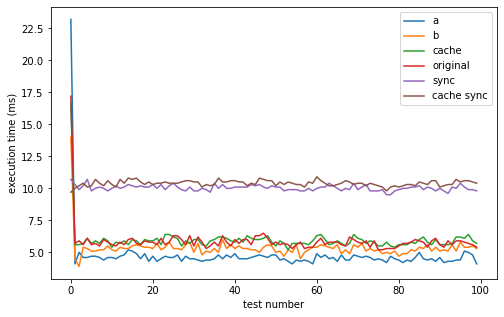

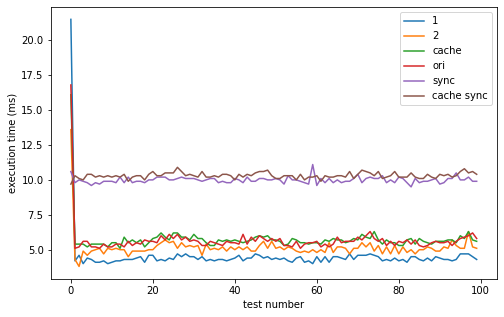

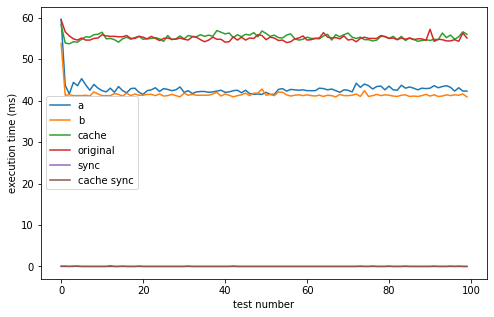

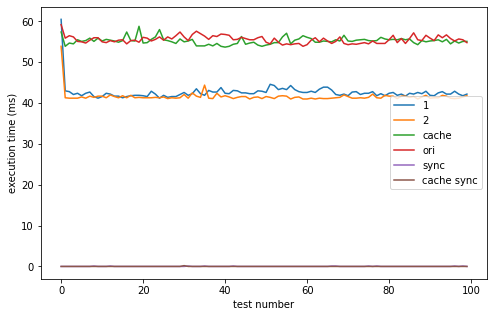

In [50]:
plt.figure(figsize=(8,5))
plt.plot(range(len(pc_chrome_data_average["wasm_normal_add_false_false"]["1"])), pc_chrome_data_average["wasm_normal_add_false_false"]["1"], label="a")
plt.plot(range(len(pc_chrome_data_average["wasm_normal_add_false_false"]["2"])), pc_chrome_data_average["wasm_normal_add_false_false"]["2"], label="b")
plt.plot(range(len(pc_chrome_data_average["wasm_normal_add_false_false"]["cache"])), pc_chrome_data_average["wasm_normal_add_false_false"]["cache"], label="cache")
plt.plot(range(len(pc_chrome_data_average["wasm_normal_add_false_false"]["ori"])), pc_chrome_data_average["wasm_normal_add_false_false"]["ori"], label="original")
plt.plot(range(len(pc_chrome_data_average["wasm_normal_add_false_false"]["sync"])), pc_chrome_data_average["wasm_normal_add_false_false"]["sync"], label="sync")
plt.plot(range(len(pc_chrome_data_average["wasm_normal_add_false_false"]["sync_cache"])), pc_chrome_data_average["wasm_normal_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(pc_chrome_data_average["wasm_eager_add_false_false"]["1"])), pc_chrome_data_average["wasm_eager_add_false_false"]["1"], label="1")
plt.plot(range(len(pc_chrome_data_average["wasm_eager_add_false_false"]["2"])), pc_chrome_data_average["wasm_eager_add_false_false"]["2"], label="2")
plt.plot(range(len(pc_chrome_data_average["wasm_eager_add_false_false"]["cache"])), pc_chrome_data_average["wasm_eager_add_false_false"]["cache"], label="cache")
plt.plot(range(len(pc_chrome_data_average["wasm_eager_add_false_false"]["ori"])), pc_chrome_data_average["wasm_eager_add_false_false"]["ori"], label="ori")
plt.plot(range(len(pc_chrome_data_average["wasm_eager_add_false_false"]["sync"])), pc_chrome_data_average["wasm_eager_add_false_false"]["sync"], label="sync")
plt.plot(range(len(pc_chrome_data_average["wasm_eager_add_false_false"]["sync_cache"])), pc_chrome_data_average["wasm_eager_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(pc_chrome_data_average["cpu_normal_add_false_false"]["1"])), pc_chrome_data_average["cpu_normal_add_false_false"]["1"], label="a")
plt.plot(range(len(pc_chrome_data_average["cpu_normal_add_false_false"]["2"])), pc_chrome_data_average["cpu_normal_add_false_false"]["2"], label="b")
plt.plot(range(len(pc_chrome_data_average["cpu_normal_add_false_false"]["cache"])), pc_chrome_data_average["cpu_normal_add_false_false"]["cache"], label="cache")
plt.plot(range(len(pc_chrome_data_average["cpu_normal_add_false_false"]["ori"])), pc_chrome_data_average["cpu_normal_add_false_false"]["ori"], label="original")
plt.plot(range(len(pc_chrome_data_average["cpu_normal_add_false_false"]["sync"])), pc_chrome_data_average["cpu_normal_add_false_false"]["sync"], label="sync")
plt.plot(range(len(pc_chrome_data_average["cpu_normal_add_false_false"]["sync_cache"])), pc_chrome_data_average["cpu_normal_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(pc_chrome_data_average["cpu_eager_add_false_false"]["1"])), pc_chrome_data_average["cpu_eager_add_false_false"]["1"], label="1")
plt.plot(range(len(pc_chrome_data_average["cpu_eager_add_false_false"]["2"])), pc_chrome_data_average["cpu_eager_add_false_false"]["2"], label="2")
plt.plot(range(len(pc_chrome_data_average["cpu_eager_add_false_false"]["cache"])), pc_chrome_data_average["cpu_eager_add_false_false"]["cache"], label="cache")
plt.plot(range(len(pc_chrome_data_average["cpu_eager_add_false_false"]["ori"])), pc_chrome_data_average["cpu_eager_add_false_false"]["ori"], label="ori")
plt.plot(range(len(pc_chrome_data_average["cpu_eager_add_false_false"]["sync"])), pc_chrome_data_average["cpu_eager_add_false_false"]["sync"], label="sync")
plt.plot(range(len(pc_chrome_data_average["cpu_eager_add_false_false"]["sync_cache"])), pc_chrome_data_average["cpu_eager_add_false_false"]["sync_cache"], label="cache sync")
plt.legend()
plt.ylabel("execution time (ms)")
plt.xlabel("test number")
plt.show()

In [70]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [28]:
stats.ttest_ind(np.array(chrome_data_all["wasm_normal_add_true_true"]["sync"]),
                np.array(chrome_data_all["wasm_normal_add_true_true"]["sync_cache"]))

Ttest_indResult(statistic=-8.187149448964272, pvalue=4.738874642424764e-16)

In [30]:
stats.ttest_ind(np.array(chrome_data_all["wasm_normal_add_true_true"]["sync"]),
                np.array(chrome_data_all["wasm_normal_add_false_false"]["sync"]))

Ttest_indResult(statistic=-21.739741069253412, pvalue=3.8436476016797155e-94)

In [85]:
stats.ttest_ind(np.array(chrome_data["wasm_normal_add_false_false"][0]["sync"][1:]),
                np.array(chrome_data["wasm_normal_add_false_false"][9]["sync"][1:]))

Ttest_indResult(statistic=14.508820180103076, pvalue=7.058096168190705e-33)

1.0
0.014107230144621508
4.76117038629893e-44
9.524721832803753e-47
8.722803297708673e-57
1.0943257977059637e-57
1.0183581900167969e-56
1.080719980586699e-53
3.517910702190709e-64
4.436506296586181e-66
9.965856007043042e-56
1.0047608303816118e-66
3.7024731401264025e-46
6.56045123008826e-70
1.719305919406868e-51
2.33765594524057e-53
2.4736505013782197e-61
3.2692045821944097e-41
3.0090980883126434e-46
3.005172535403223e-66
2.4159789193726746e-45
2.210703111641518e-33
2.1044660957262076e-17
5.3817853188412715e-11
1.1077042662592807e-10
2.726434850230929e-27
2.2994726691475975e-28
2.199436799947341e-71
5.287335729806682e-52
2.361278283216266e-83
1.746738559454359e-55
4.69967663711754e-74
1.7413429206662127e-59
4.4443807812111317e-54
2.1431079898815824e-32
2.0763498167107948e-175


C:\Users\woody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_hypotests.py:112: RuntimeWarning: divide by zero encountered in true_divide
  ts = np.reshape(t, (-1, 1)) / sigma
C:\Users\woody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_hypotests.py:115: RuntimeWarning: invalid value encountered in cos
  gx = np.vstack((np.cos(ts*x), np.sin(ts*x))).T  # shape = (nx, 2*len(t))
C:\Users\woody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_hypotests.py:115: RuntimeWarning: invalid value encountered in sin
  gx = np.vstack((np.cos(ts*x), np.sin(ts*x))).T  # shape = (nx, 2*len(t))
C:\Users\woody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_hy

LinAlgError: SVD did not converge

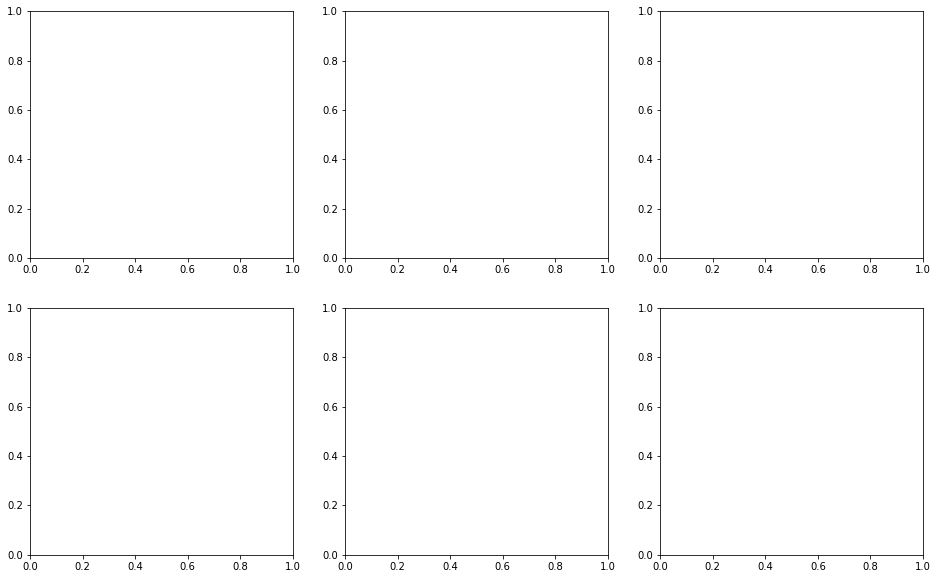

In [203]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_normal_add_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    print(stats.epps_singleton_2samp(t, temp[0], t=(0.4, 0.8)).pvalue)
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_add_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_normal_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_normal_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_normal_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_normal_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_normal_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_normal_div_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_div_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_normal_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_normal_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_normal_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_normal_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_normal_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_normal_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = [stats.epps_singleton_2samp(t, tt, t=(0.4, 0.8)).pvalue for tt in temp]
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

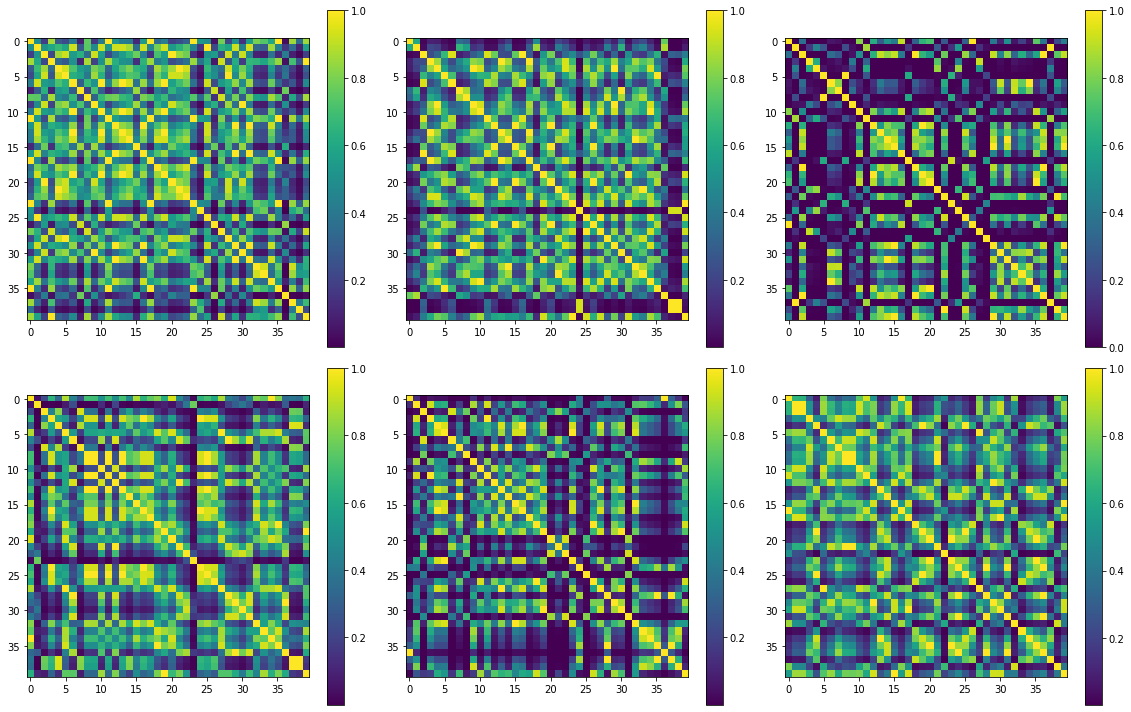

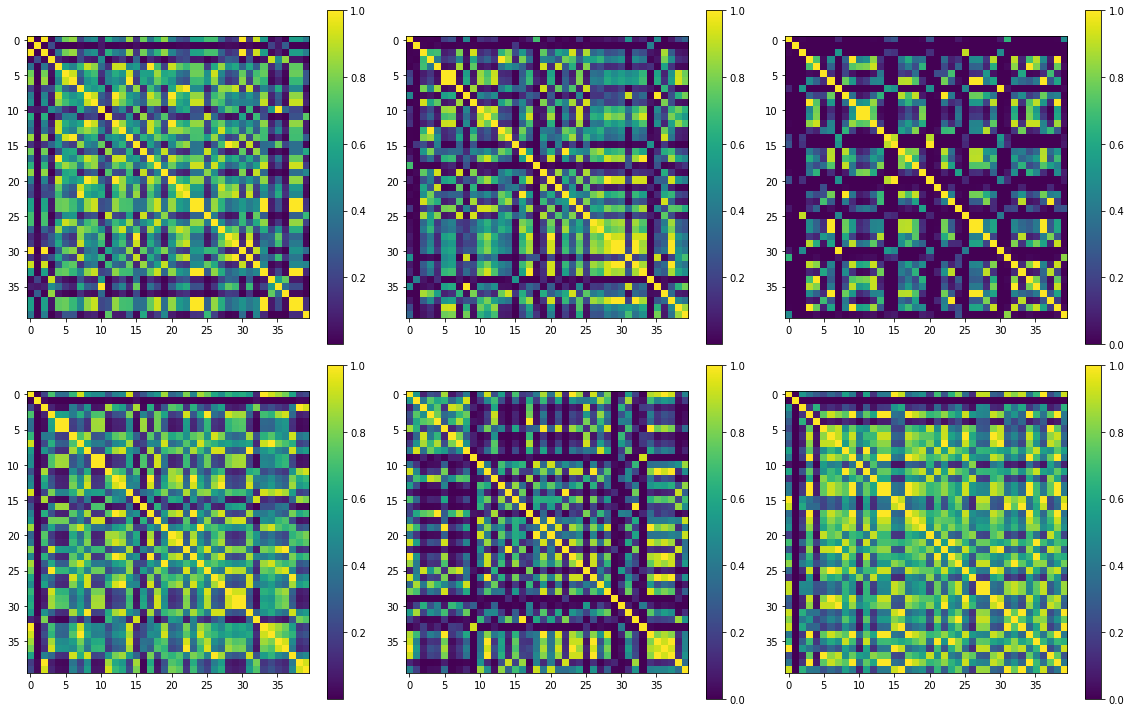

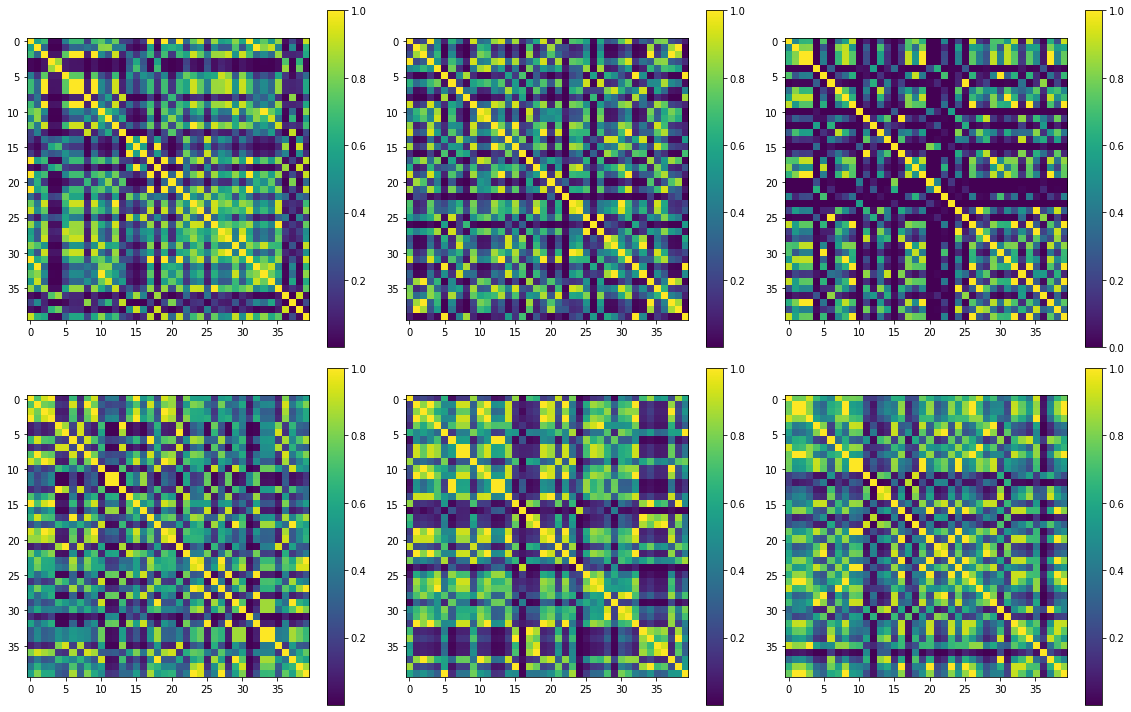

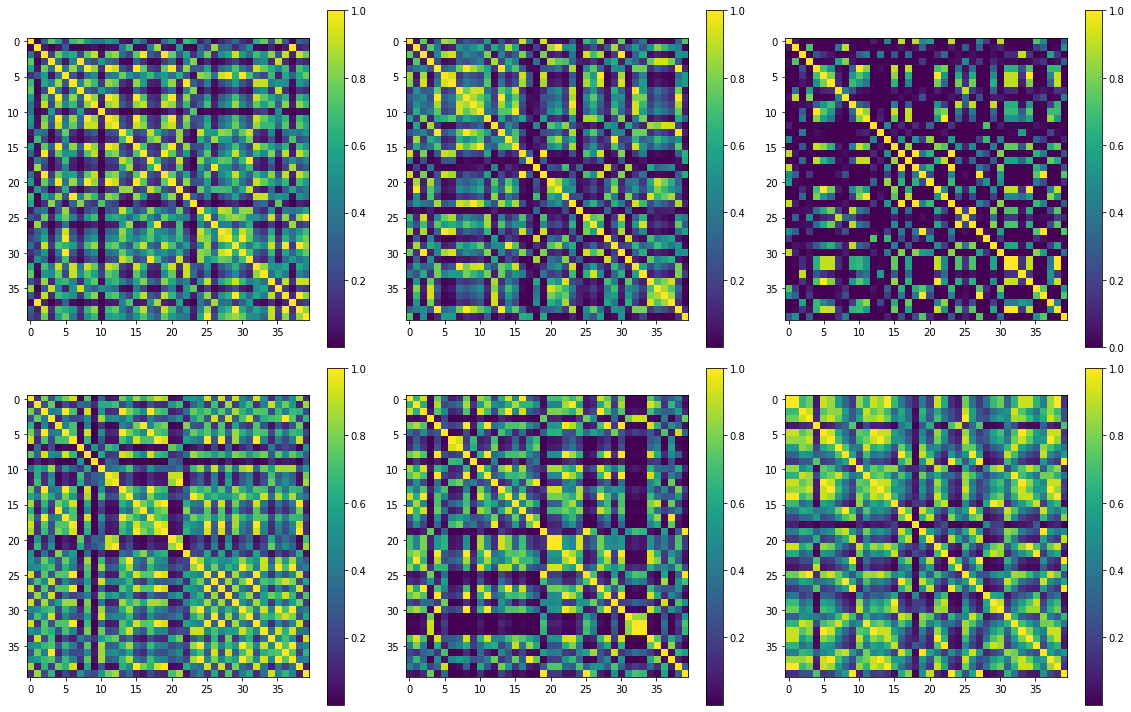

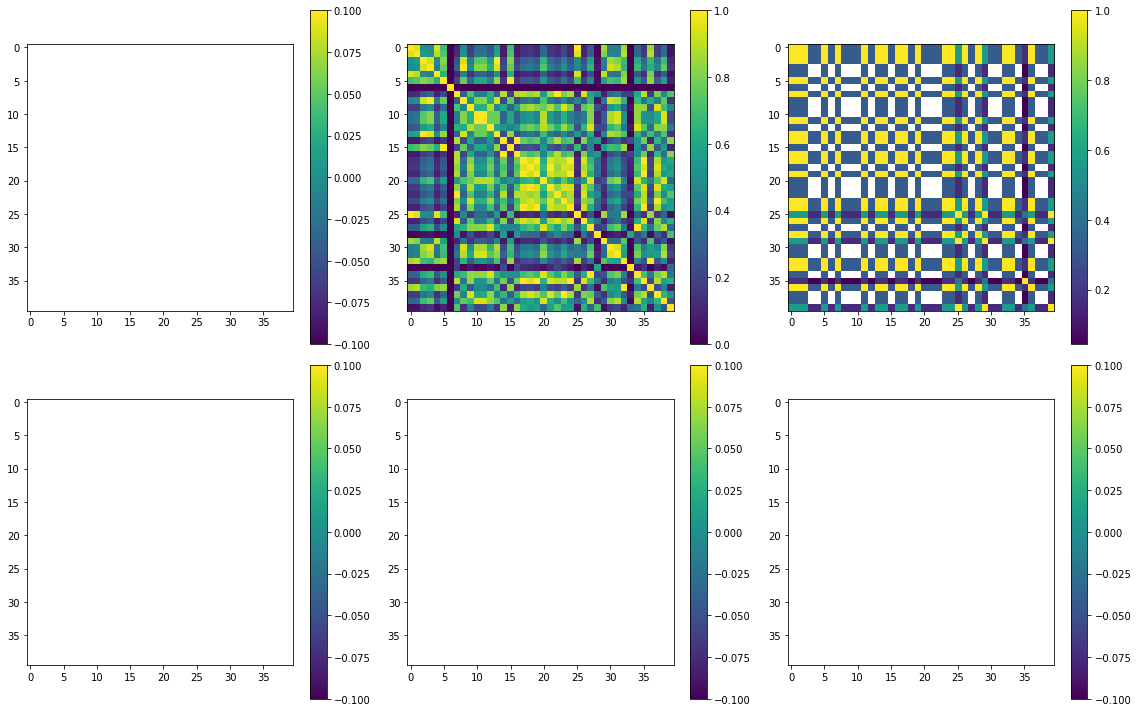

In [142]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_eager_add_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_add_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_eager_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_eager_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_eager_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_eager_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_eager_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_eager_div_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_div_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_eager_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["wasm_eager_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["wasm_eager_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["wasm_eager_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["wasm_eager_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["wasm_eager_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

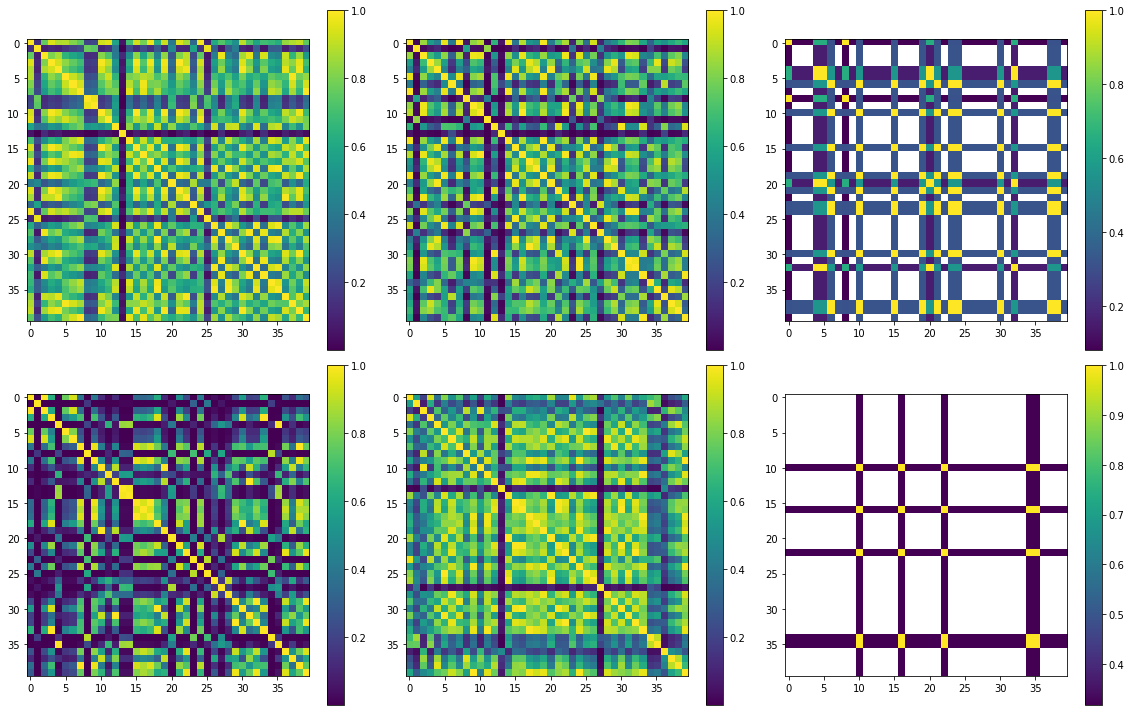

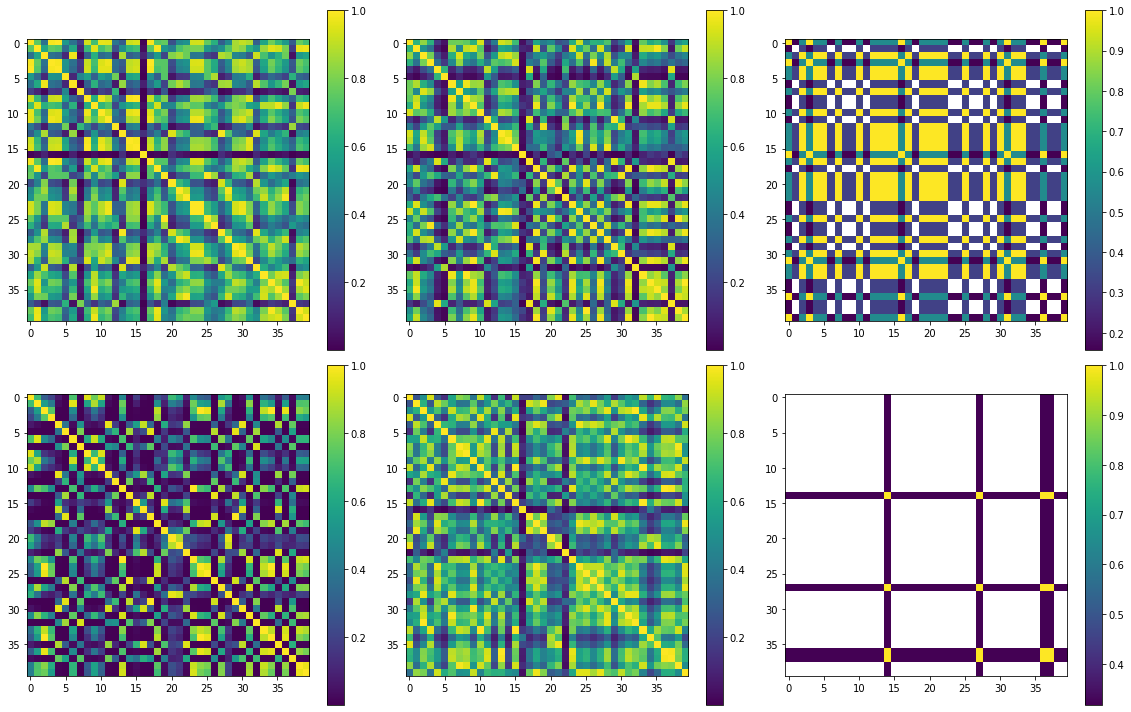

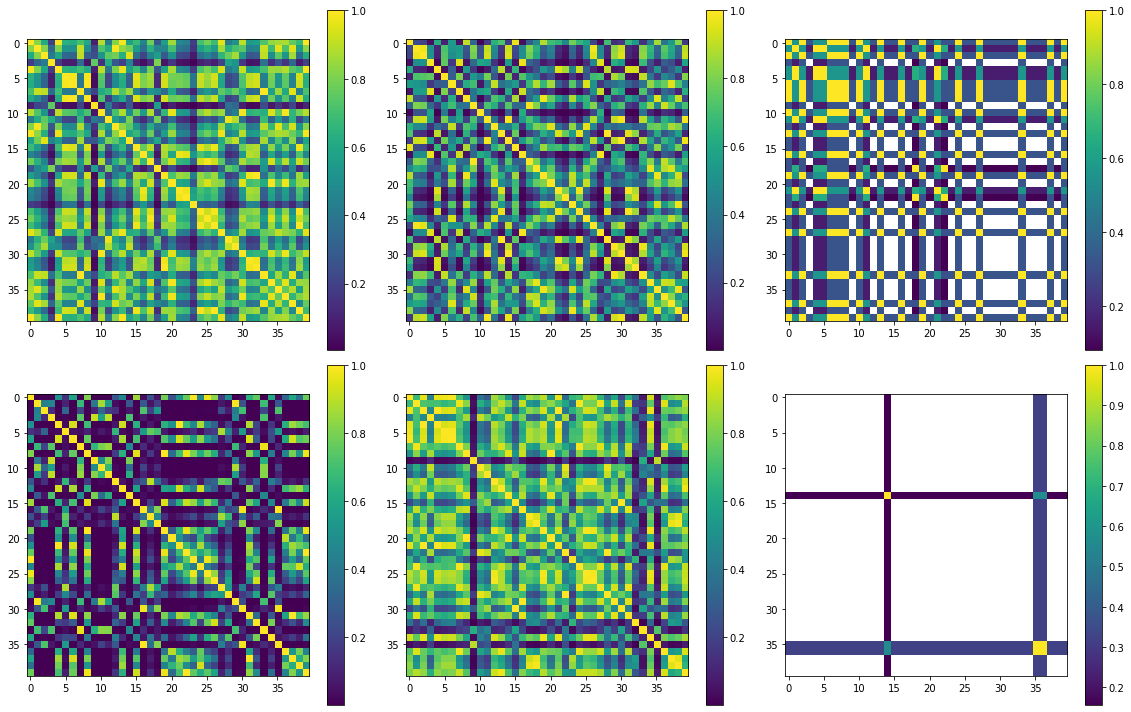

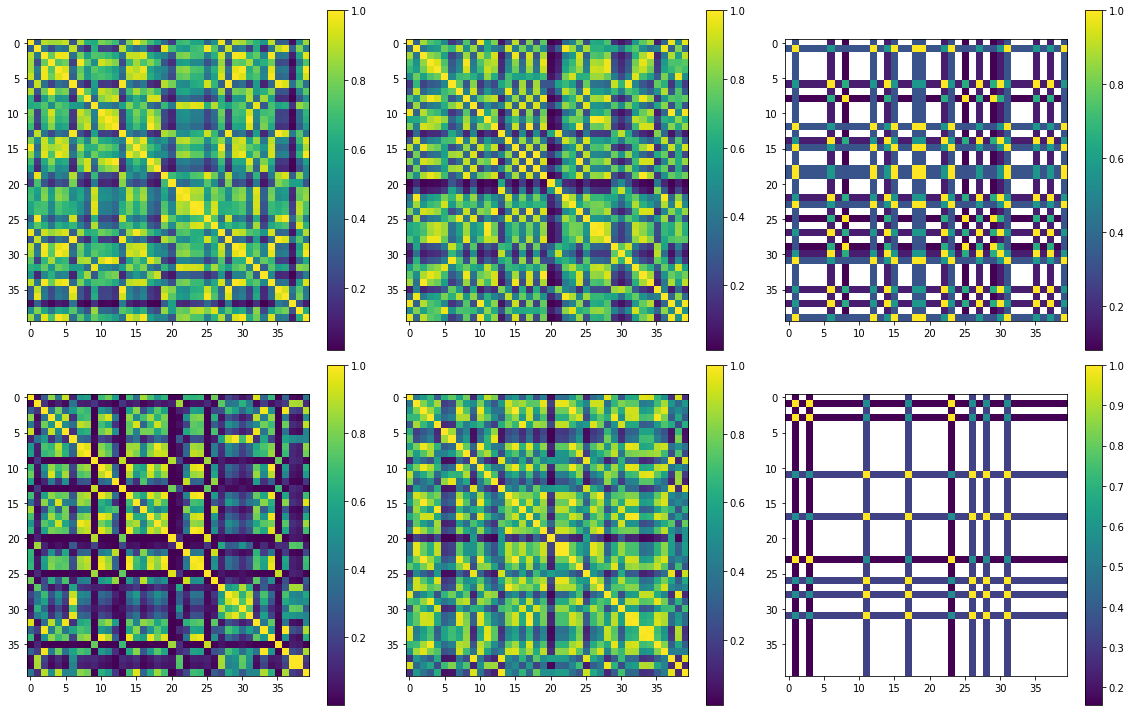

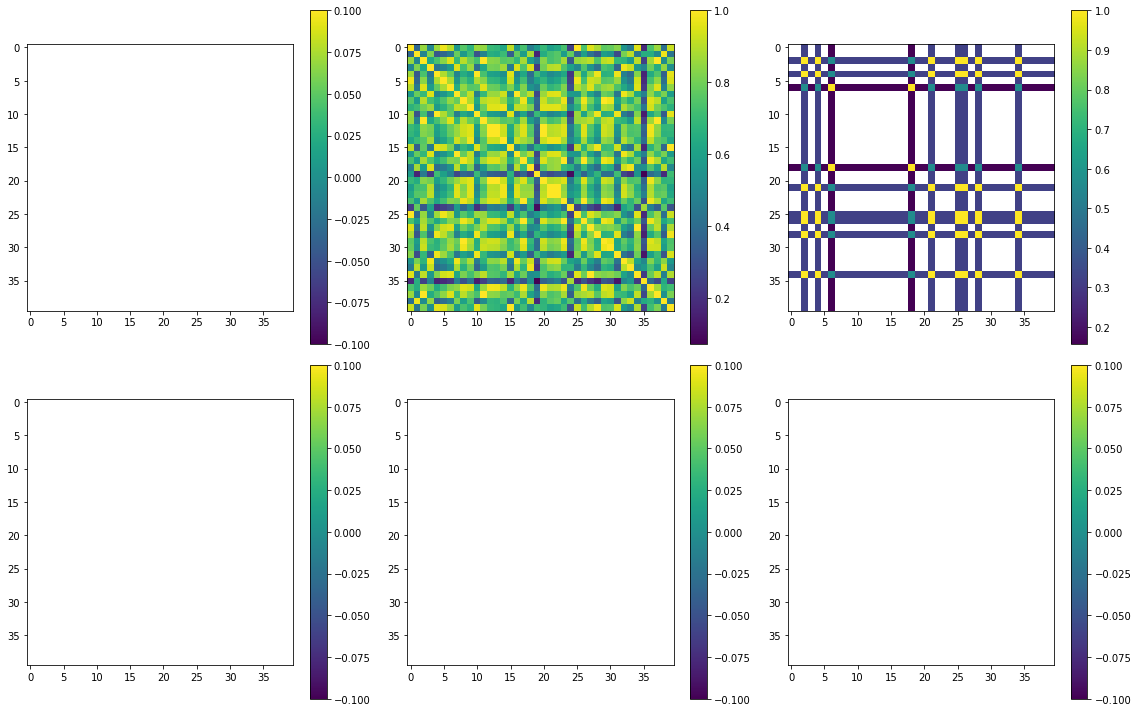

In [143]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_normal_add_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_add_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_normal_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_normal_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_normal_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_normal_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_normal_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_normal_div_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_div_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_normal_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_normal_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_normal_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_normal_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_normal_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_normal_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

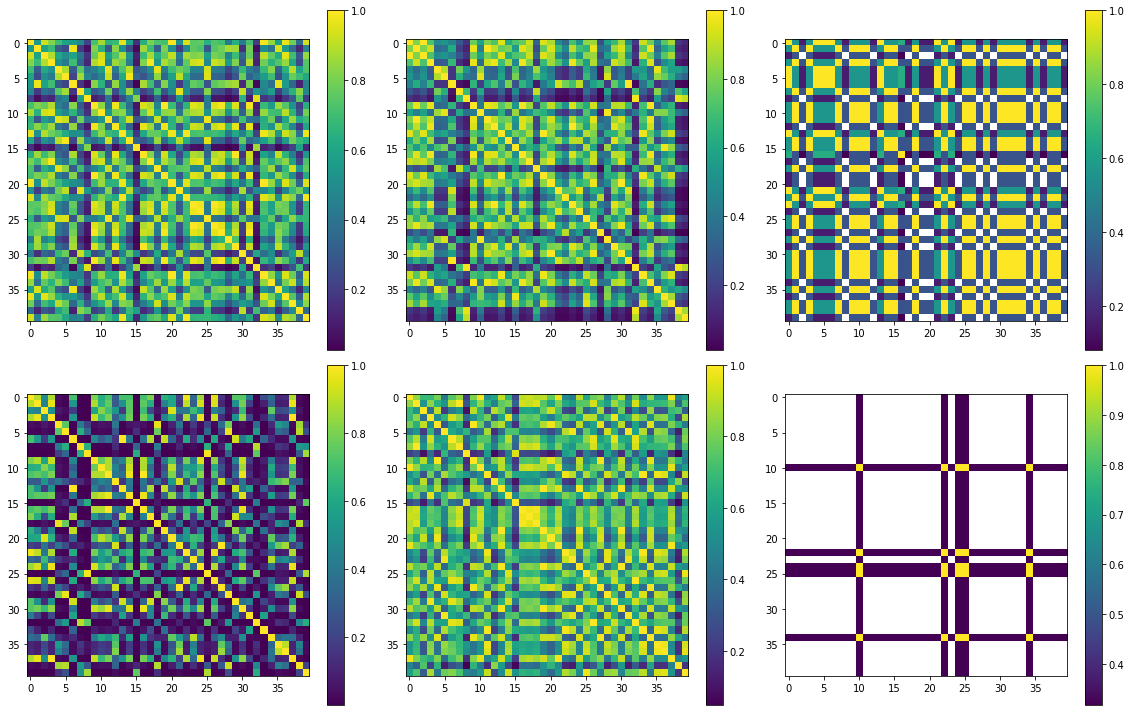

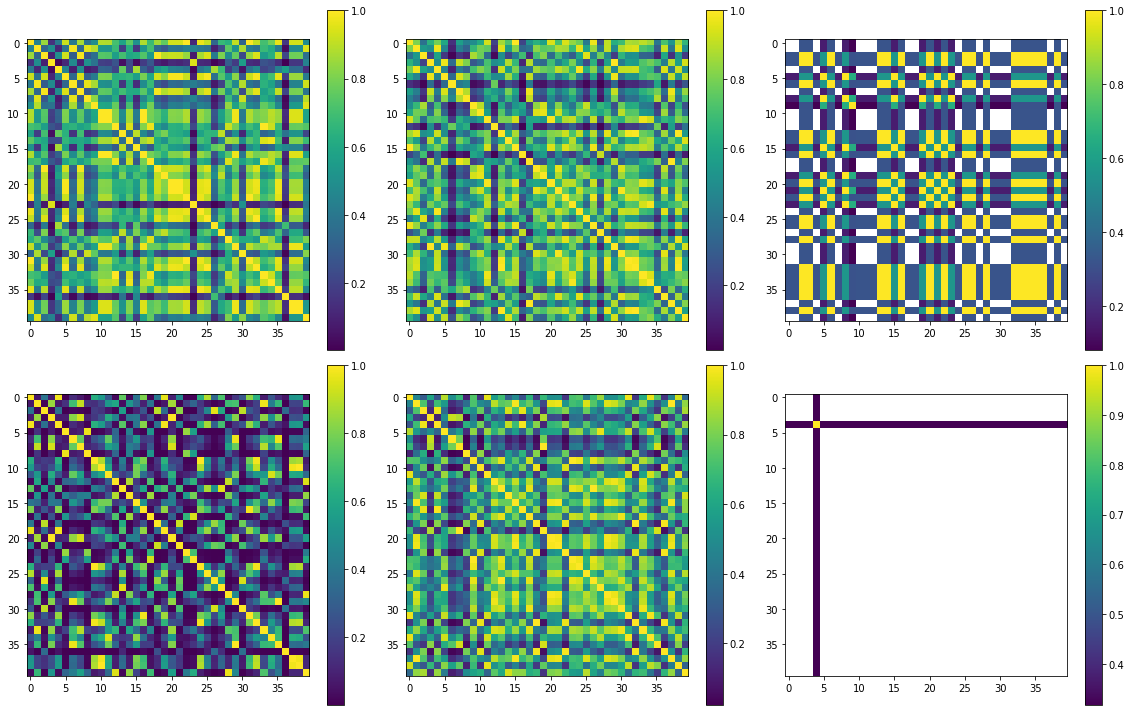

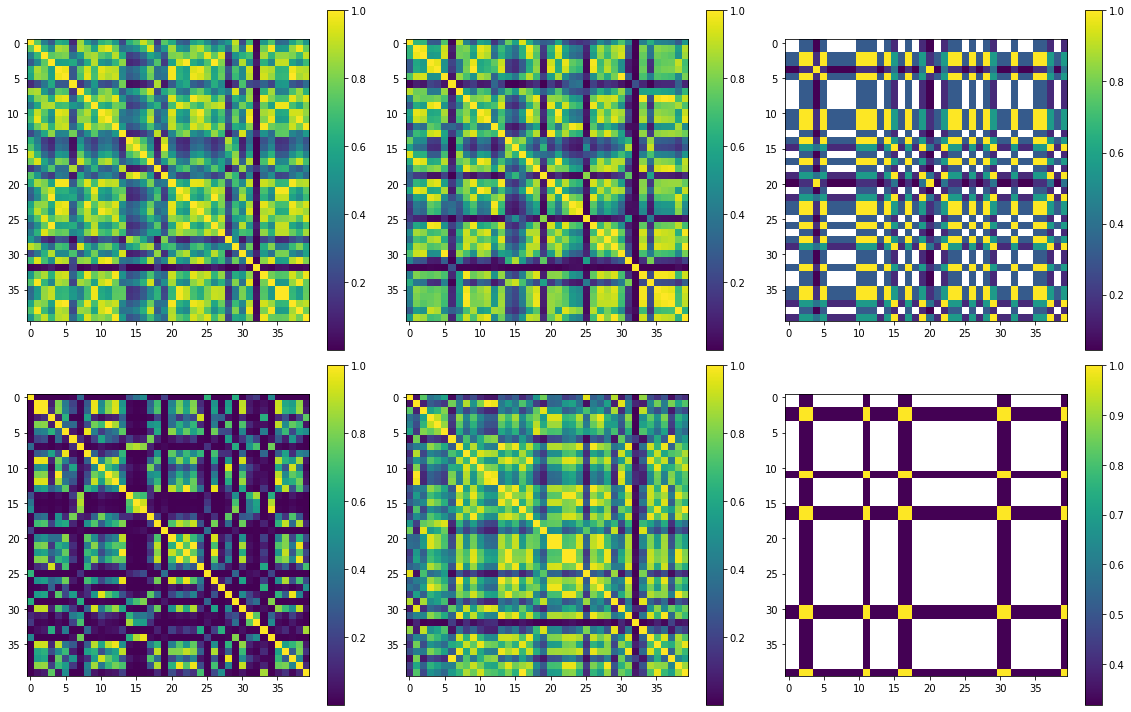

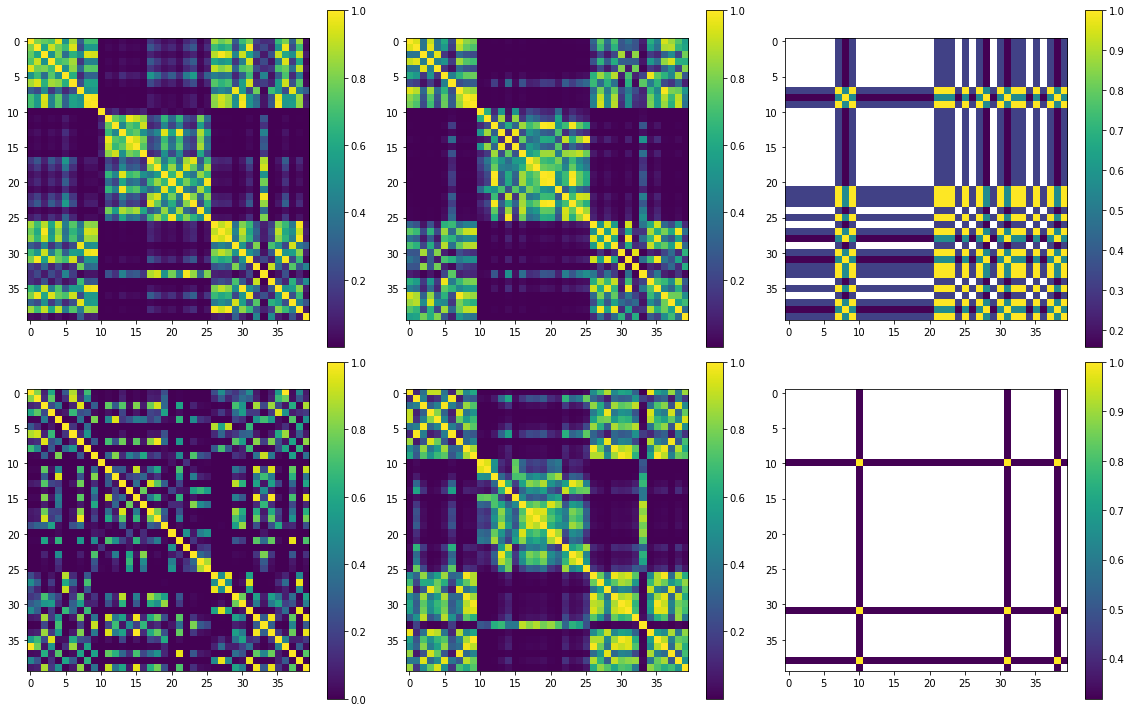

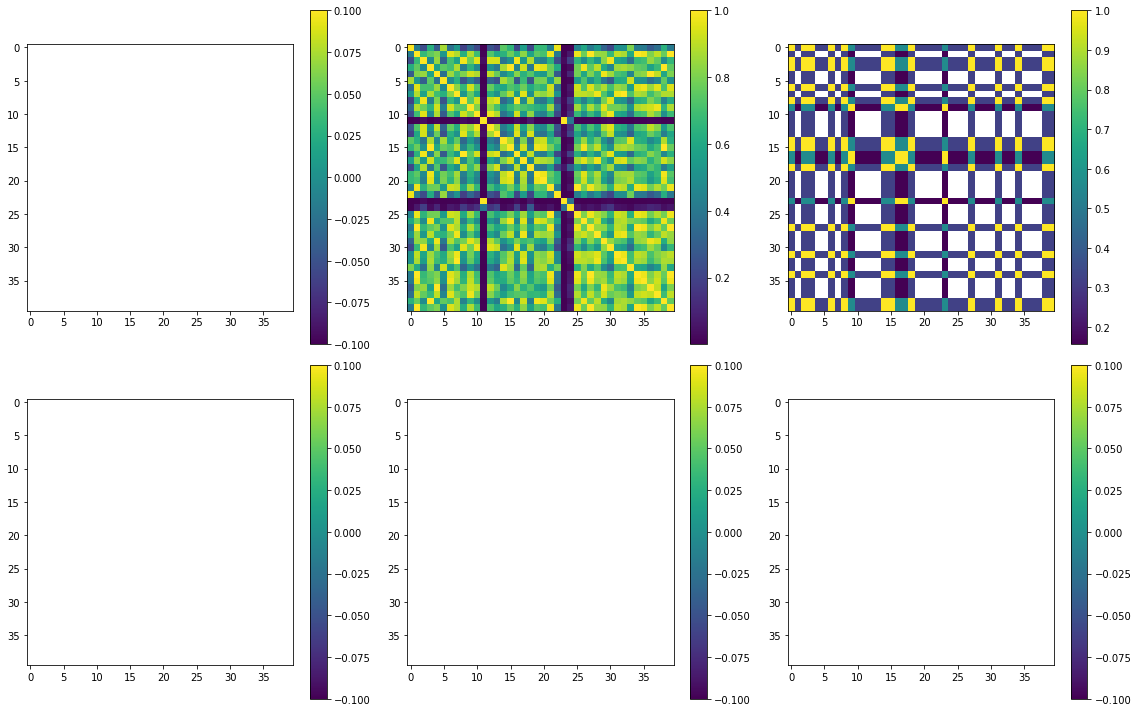

In [144]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_eager_add_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_add_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_eager_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_eager_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_eager_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_eager_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_eager_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_eager_div_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_div_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_eager_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([chrome_data["cpu_eager_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([chrome_data["cpu_eager_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([chrome_data["cpu_eager_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([chrome_data["cpu_eager_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [chrome_data["cpu_eager_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

In [148]:
import numpy as np
import scipy.stats

def jd(p, qq):
    result = []
    for q in qq:
        result += [jensen_shannon_distance(p, q)]
    return result

def jensen_shannon_distance(p, q):
    """
    method to compute the Jenson-Shannon Distance 
    between two probability distributions
    """

    # convert the vectors into numpy arrays in case that they aren't
    p = np.array(p)
    q = np.array(q)

    # calculate m
    m = (p + q) / 2

    # compute Jensen Shannon Divergence
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2

    # compute the Jensen Shannon Distance
    distance = np.sqrt(divergence)

    return distance

C:\Users\woody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
C:\Users\woody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_entropy.py:78: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


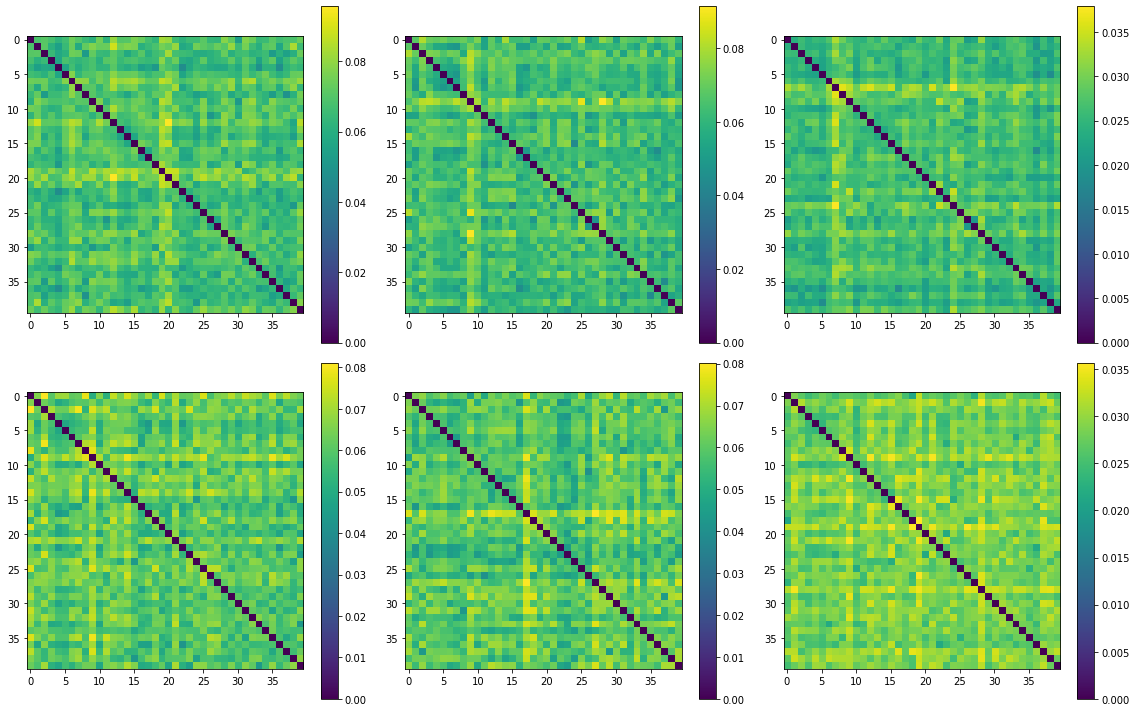

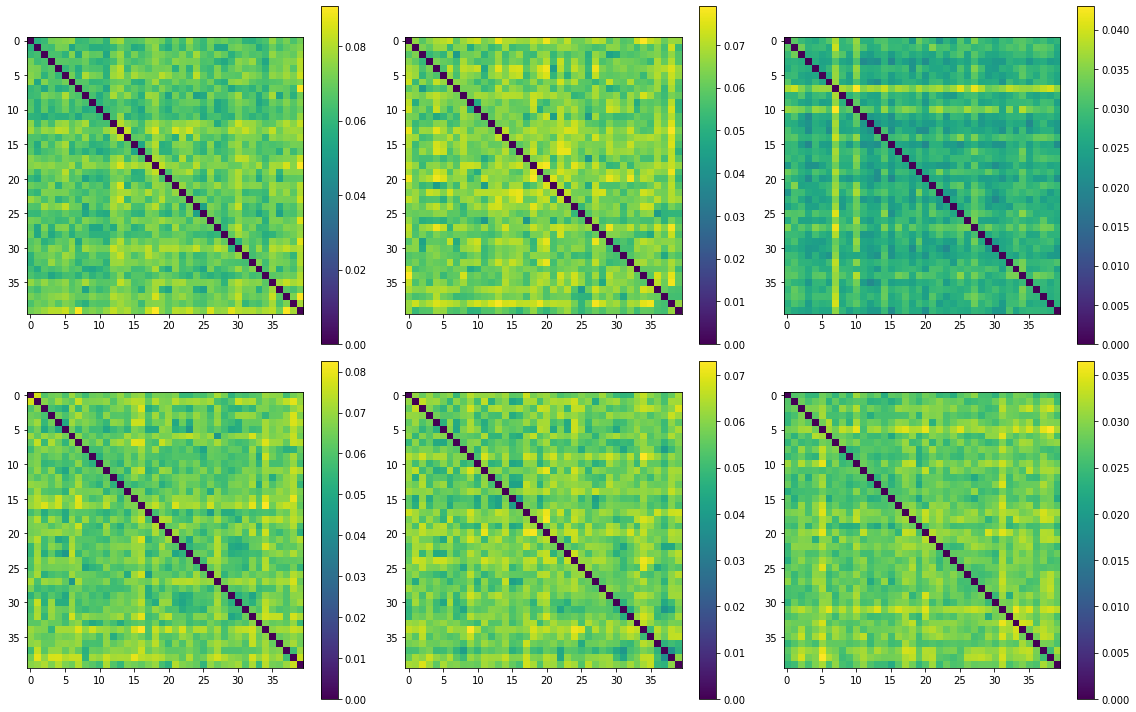

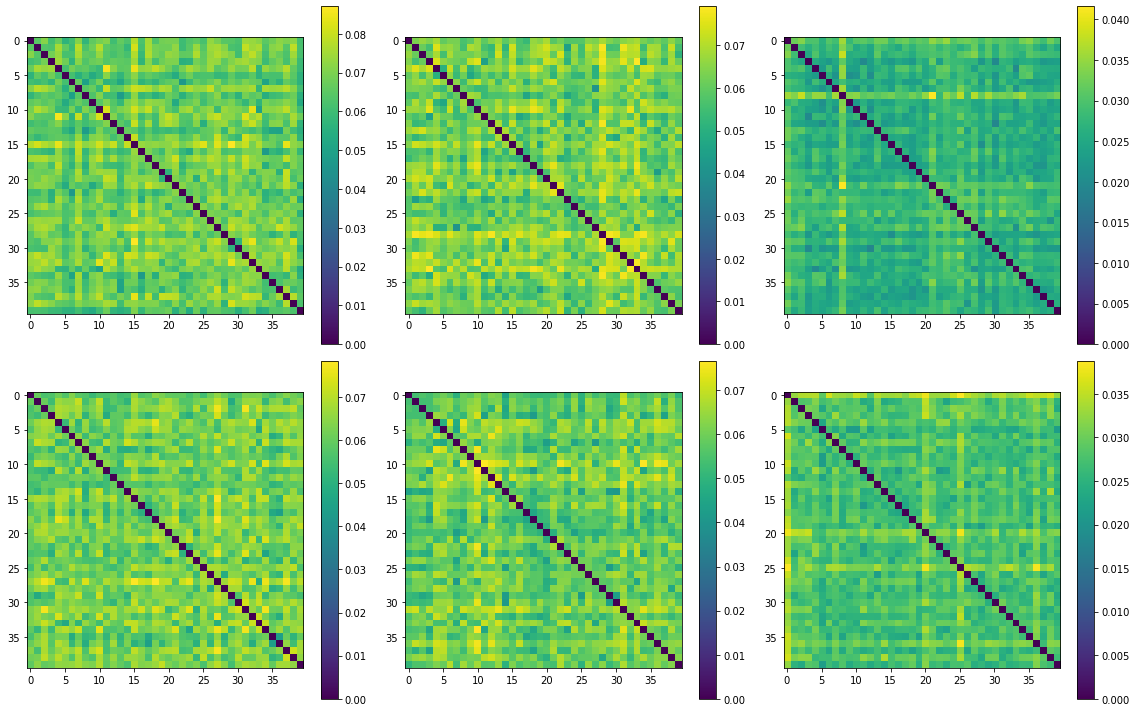

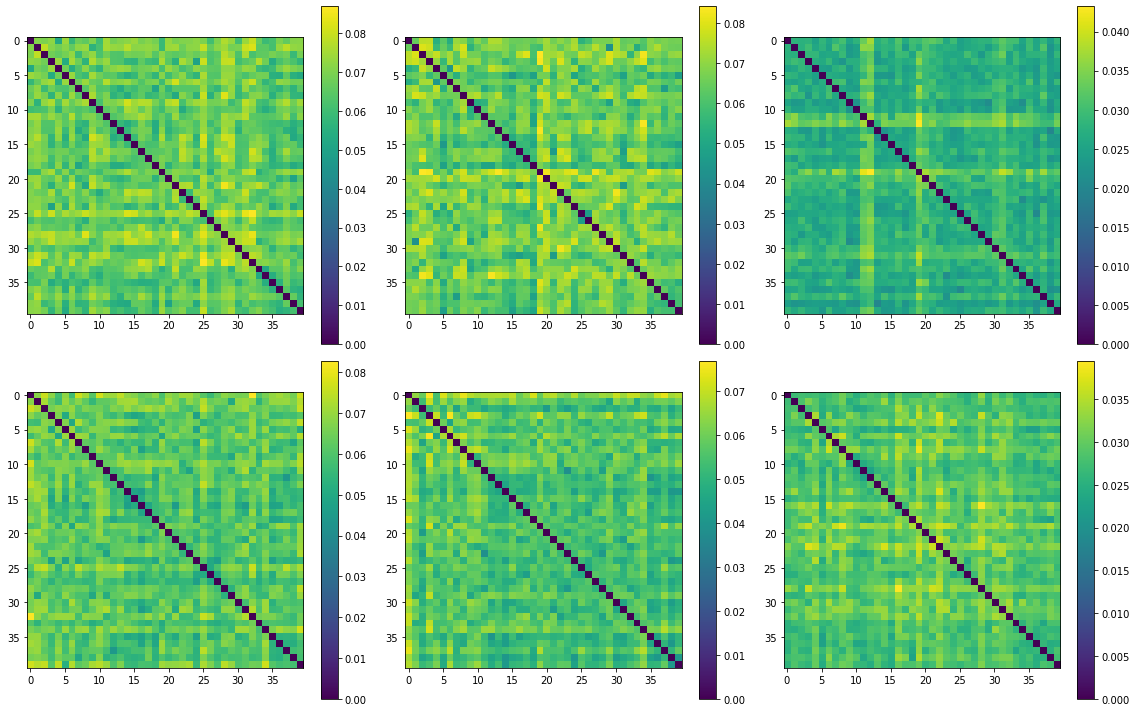

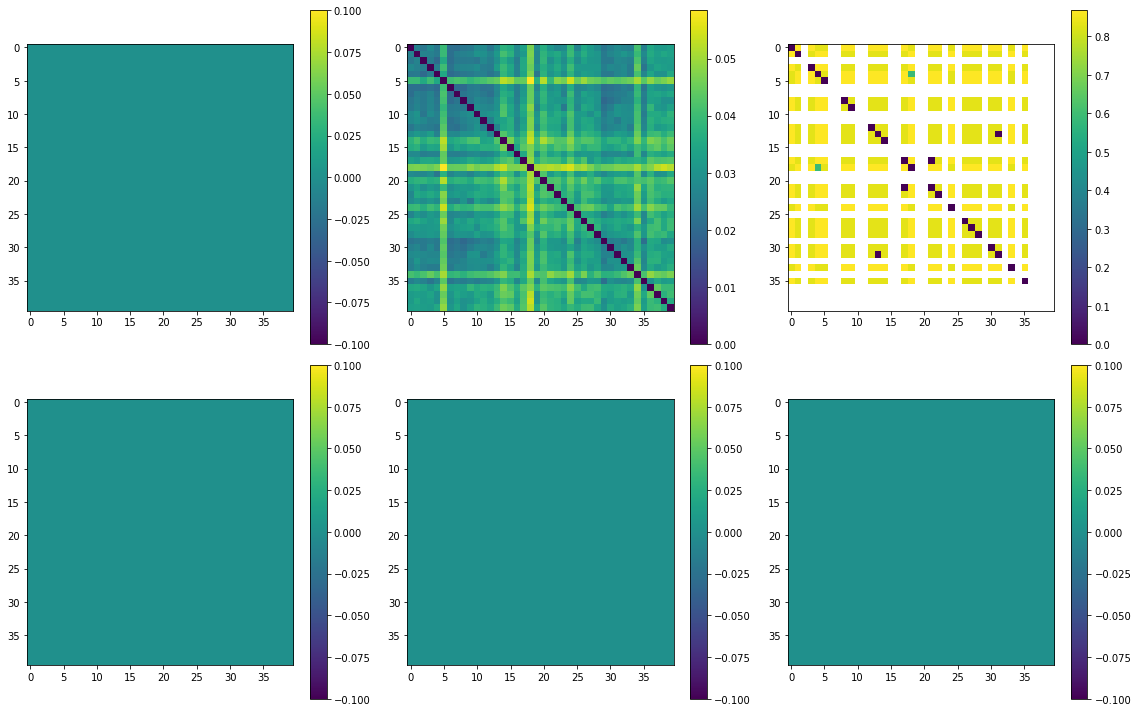

In [149]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    # result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

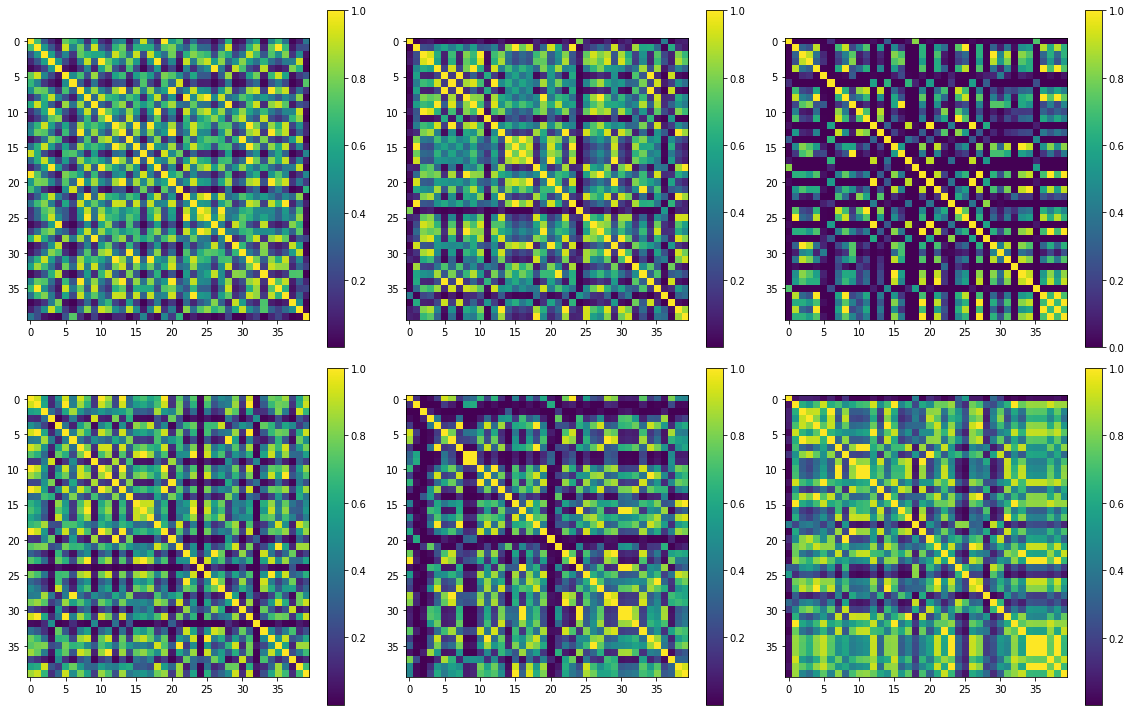

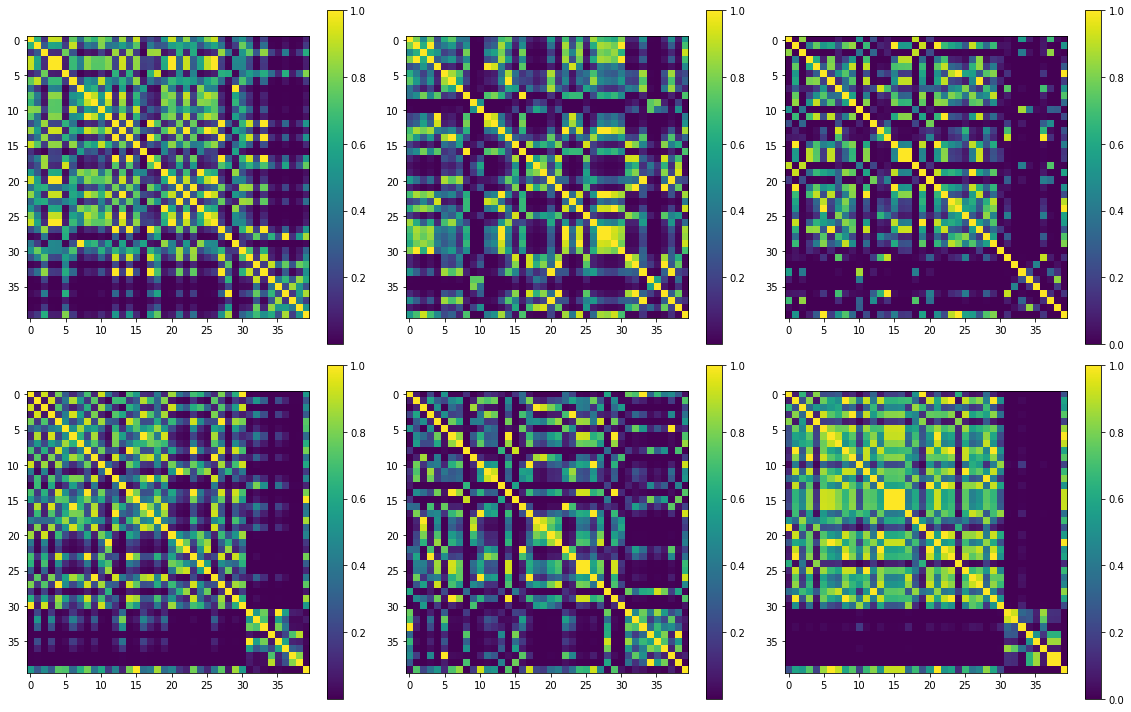

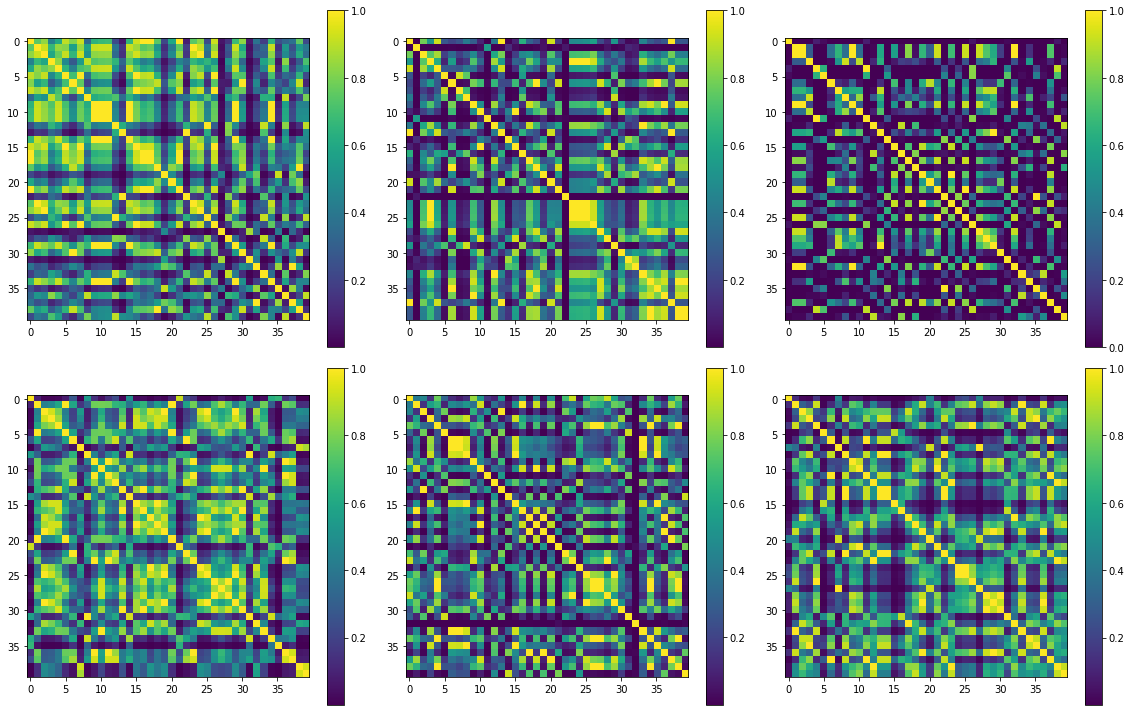

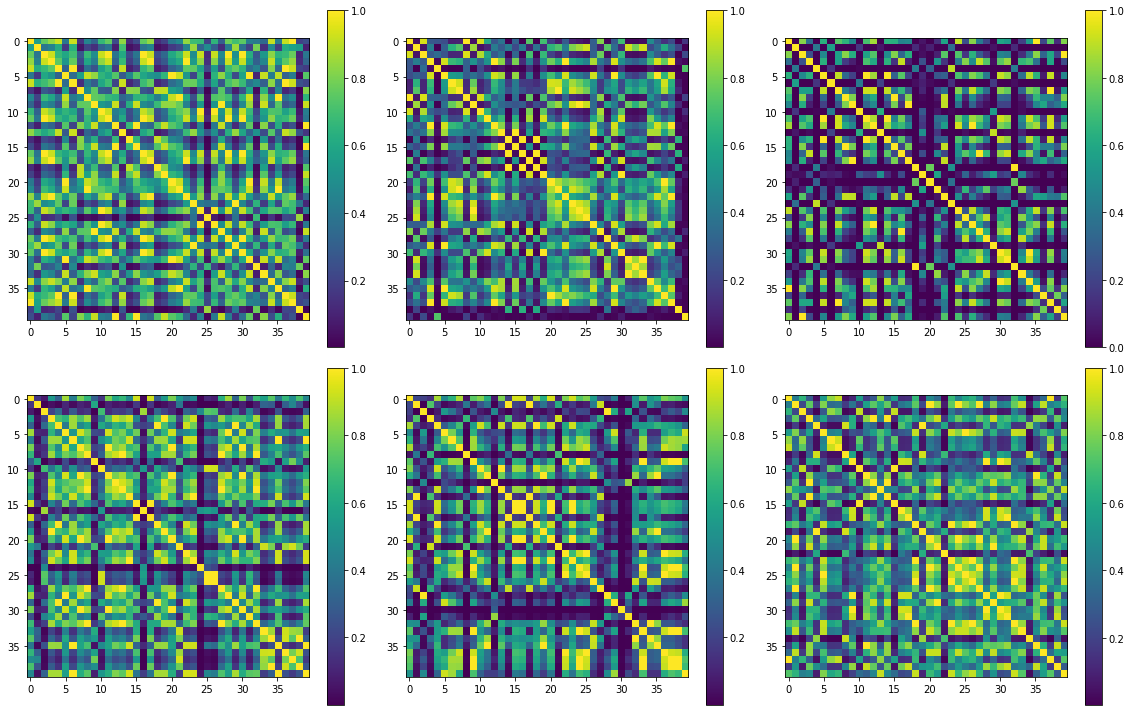

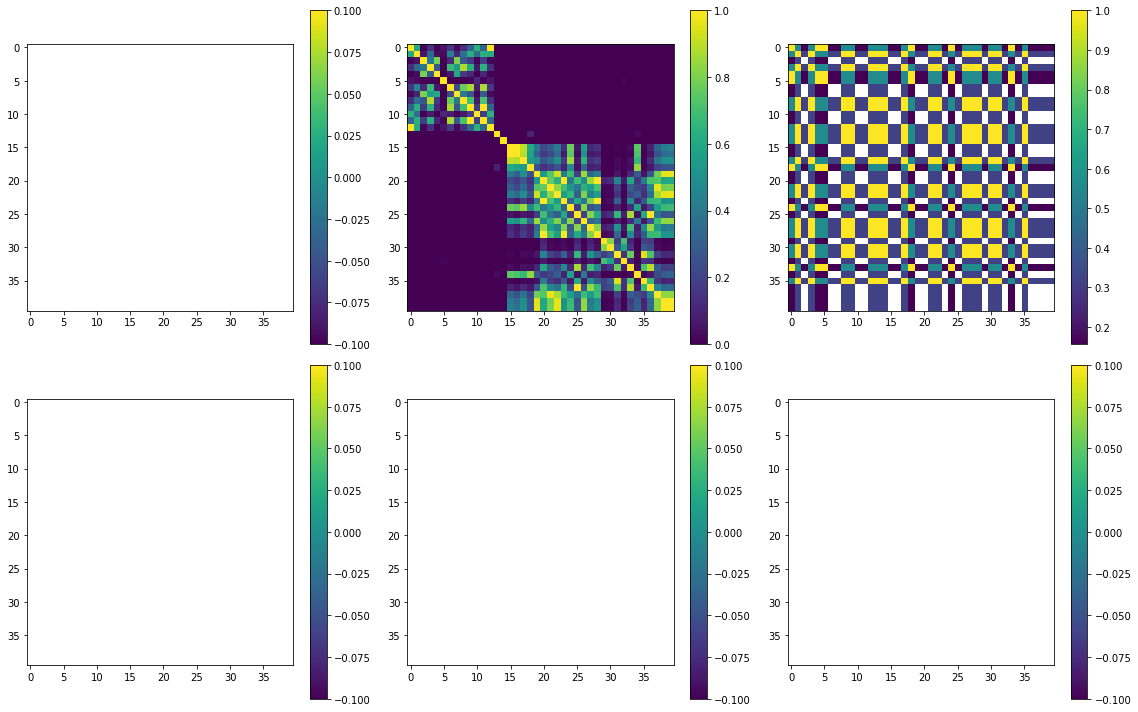

In [150]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_normal_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_normal_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
    # result_matrix[ii] = jd(t, temp)
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

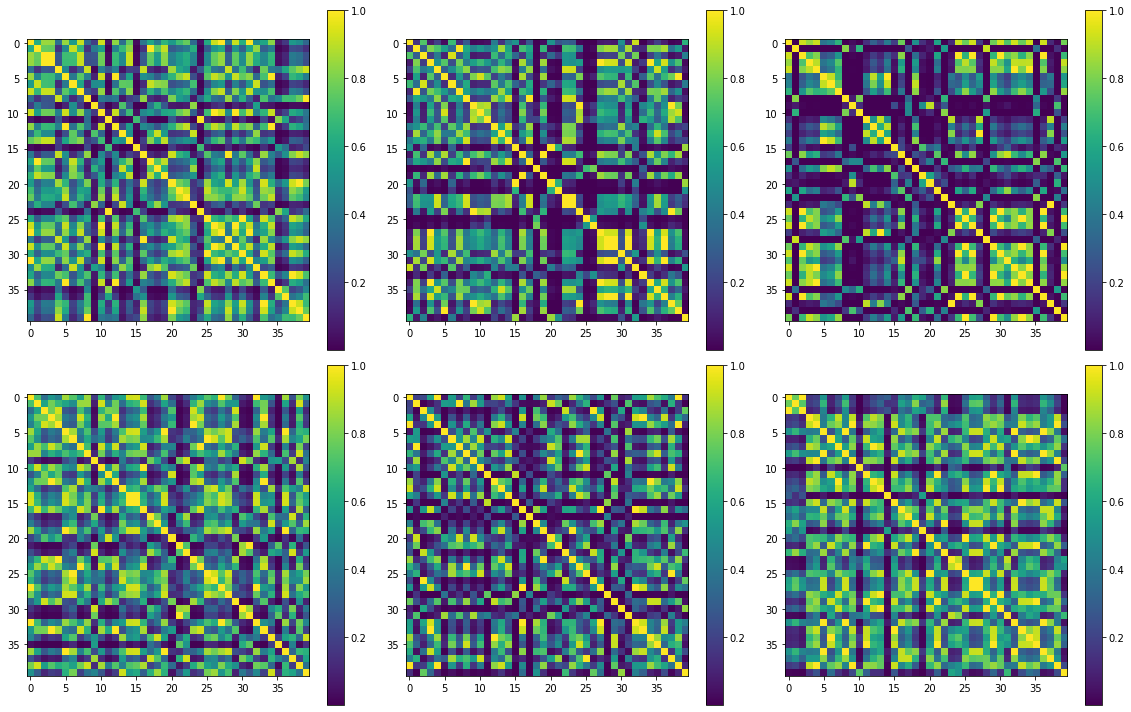

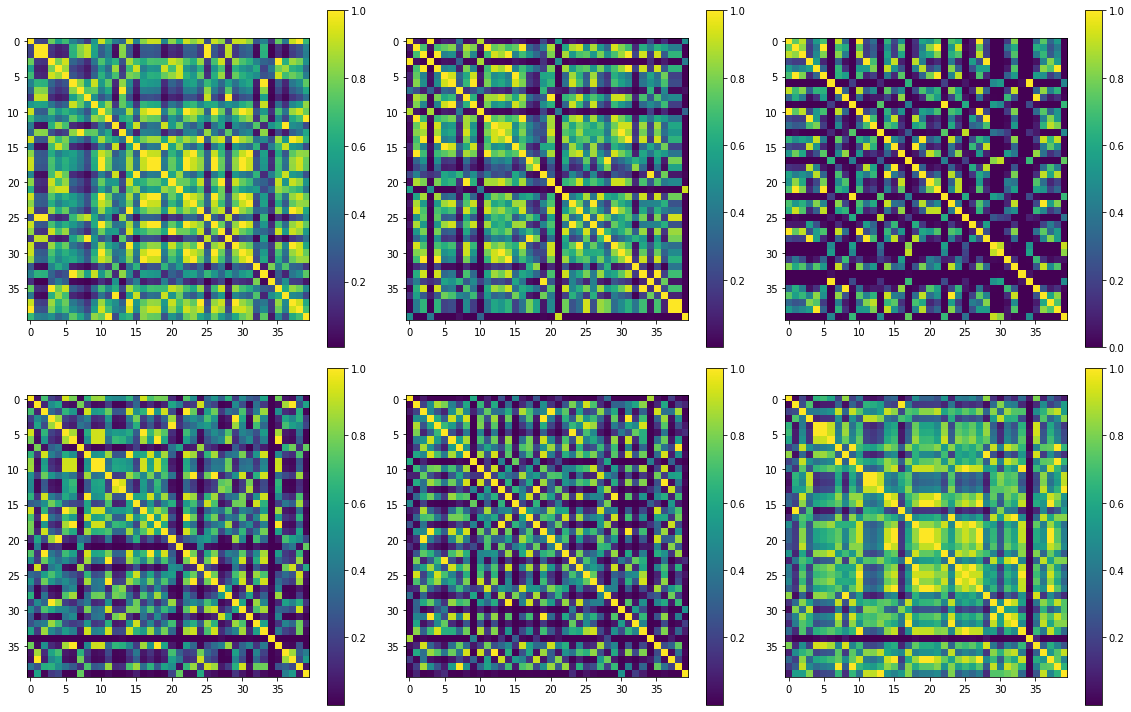

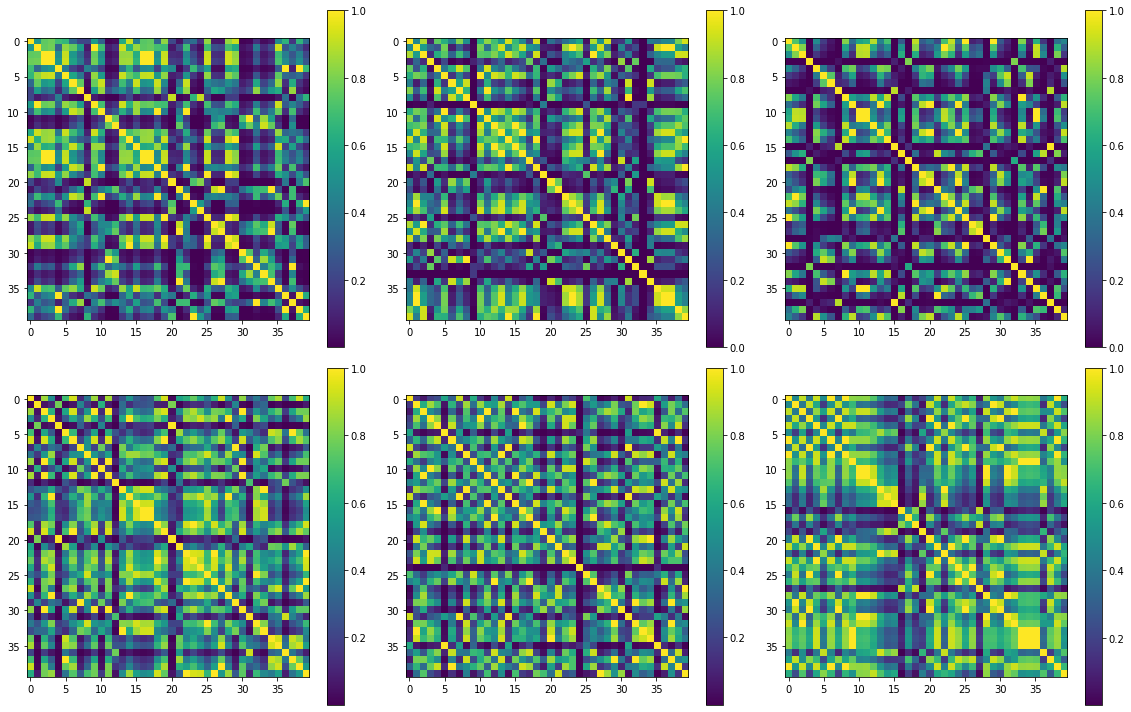

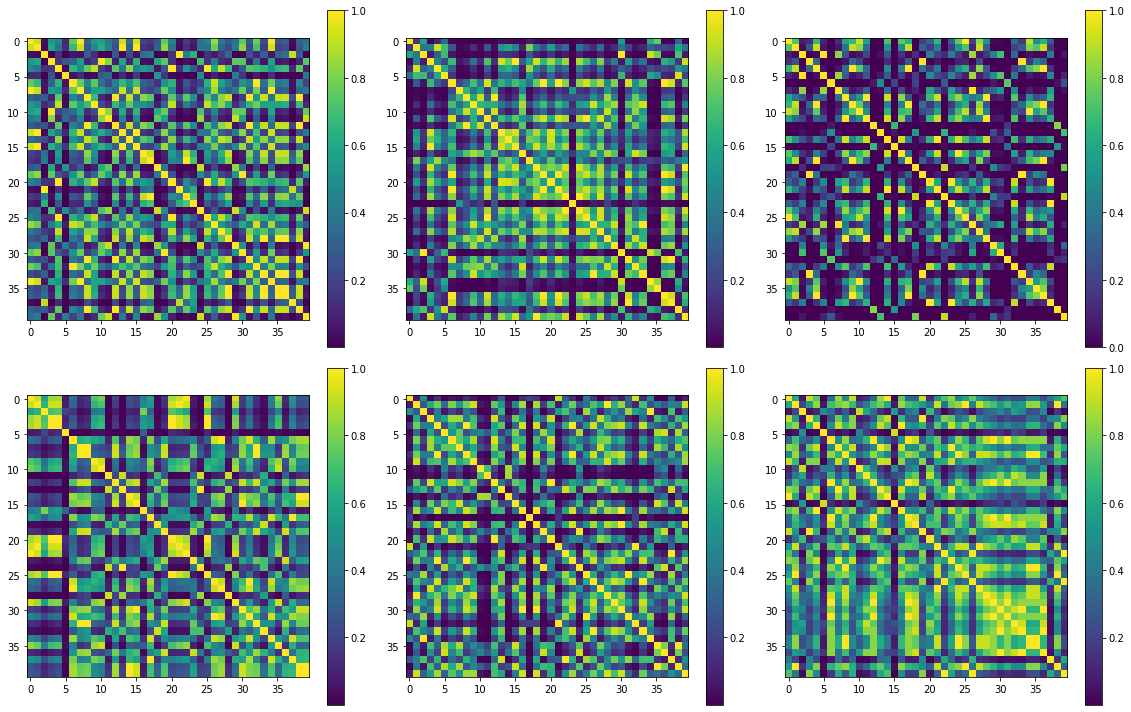

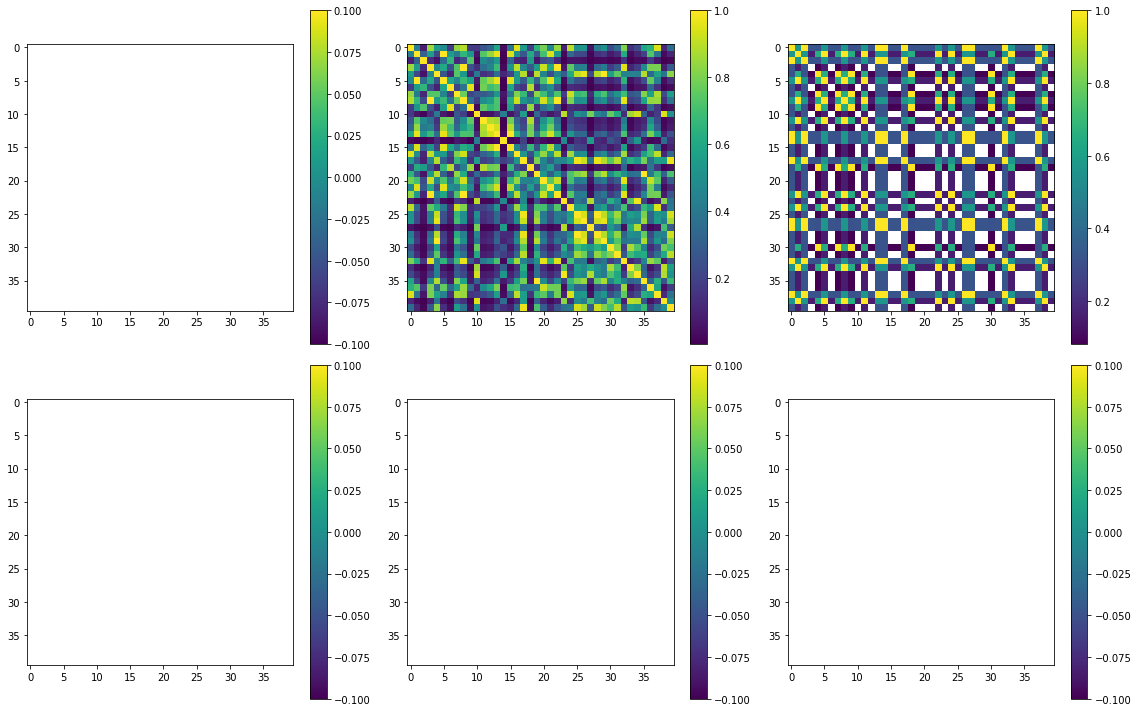

In [146]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_eager_add_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_add_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_add_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_add_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_add_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_eager_add_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_add_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_eager_sub_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_sub_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_sub_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_sub_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_sub_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_eager_sub_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_sub_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_eager_mul_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_mul_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_mul_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_mul_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_mul_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_eager_mul_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_mul_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_eager_div_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_div_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_div_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_div_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_div_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_eager_div_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_div_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

temp = np.array([edge_data["wasm_eager_dot_false_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_false_true"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_false"][x]["1"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_true"][x]["1"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_dot_false_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_false_true"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_false"][x]["2"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_true"][x]["2"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,0].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,0])
# plt.show()

temp = np.array([edge_data["wasm_eager_dot_false_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_false_true"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_false"][x]["ori"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_true"][x]["ori"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_dot_false_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_false_true"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_false"][x]["cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_true"][x]["cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,1].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,1])
# plt.show()

temp = np.array([edge_data["wasm_eager_dot_false_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_false_true"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_false"][x]["sync"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_true"][x]["sync"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[0,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[0,2])
# plt.show()

temp = np.array([edge_data["wasm_eager_dot_false_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_false_true"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_false"][x]["sync_cache"][1:] for x in range(10)]+
                [edge_data["wasm_eager_dot_true_true"][x]["sync_cache"][1:] for x in range(10)])
result_matrix = [0 for x in range(40)]
for ii, t in enumerate(temp):
    result_matrix[ii] = stats.ttest_ind(t, temp.T).pvalue
im = axs[1,2].imshow(result_matrix, interpolation='none')
plt.colorbar(im, ax=axs[1,2])
# plt.show()
fig.tight_layout()

In [216]:
# stats.ttest_ind([-100,100],[1,2,3,4])
import numpy as np
from scipy.stats import ks_2samp

np.random.seed(52)

n1 = 100
n2 = 100

mu_1 = 5
mu_2 = 10

sigma_1 = 0.3
sigma_2 = 0.2


sample_1 = np.random.normal(mu_1, sigma_1, n1)
sample_2 = np.random.normal(mu_2, sigma_2, n2)

result = ks_2samp(sample_1, sample_2)

print(result.pvalue)
ks_2samp([-100,100,-100,-100,100,100], [1,2,3,4,5,6], alternative='two-sided', mode="exact")
# jensen_shannon_distance(np.array([-100, 100]), np.array([1,2,3,4]))

2.2087606931995054e-59


KstestResult(statistic=0.5, pvalue=0.474025974025974)

In [204]:
stats.epps_singleton_2samp([1,1,1,6,6,6], [1,2,3,4,5,6], t=(0.4, 0.8))

Epps_Singleton_2sampResult(statistic=5.246227071871927, pvalue=0.26295304812897297)

In [213]:
stats.ttest_ind([-100,100,-100], )

Ttest_indResult(statistic=-1.7337511355439685, pvalue=0.0963490462662466)

In [348]:
len(np.array([[1],[2,3]]).shape)

<ipython-input-348-54d7f8cec6e2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  len(np.array([[1],[2,3]]).shape)


1

In [352]:
def combine_sets(index, all_n):
    return np.concatenate(all_n[index])

def find_best_index(n_index:np.array, all_n:np.array)->int:
    current_set = combine_sets(n_index, all_n)
    if len(all_n.shape)==1:
        result = np.array([stats.ttest_ind(current_set, nnn).pvalue for nnn in all_n])
    else:
        result = stats.ttest_ind(current_set, all_n.T).pvalue
    result[n_index]=0
    if max(result) > 0.05:
        return list(result).index(max(result)), max(result)
    return -1, -1

def find_set(n_index, all_n, score=0):
    t1, t2 = find_best_index(n_index, all_n)
    if t1==-1:
        return n_index, score
    return find_set(n_index+[t1], all_n, score+t2)

def find_best_set(all_n):
    ans_set = [find_set([x], all_n) for x in range(len(all_n))]
    ans_set = sorted(ans_set, key=lambda x:-x[1])
    return ans_set[0]

In [353]:
chrome_data_combine = {}
for backend in ["wasm", "cpu"]:
    for mode in ["normal", "eager"]:
        for op in ["add", "sub", "mul", "div", "dot"]:
            chrome_data_combine[f"{backend}_{mode}_{op}"] = {}
            for dd in ["1", "2", "ori", "cache", "sync", "sync_cache"]:
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd]\
                = np.array([chrome_data[f"{backend}_{mode}_{op}_false_false"][x][dd][1:] for x in range(10)]+
                            [chrome_data[f"{backend}_{mode}_{op}_false_true"][x][dd][1:] for x in range(10)]+
                            [chrome_data[f"{backend}_{mode}_{op}_true_false"][x][dd][1:] for x in range(10)]+
                            [chrome_data[f"{backend}_{mode}_{op}_true_true"][x][dd][1:] for x in range(10)])
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_index"]\
                = find_best_set(chrome_data_combine[f"{backend}_{mode}_{op}"][dd])[0]

                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff"]\
                = np.array([chrome_data[f"{backend}_{mode}_{op}_false_false"][x][dd][1:] for x in range(10)])
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff_index"]\
                = find_best_set(chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff"])[0]

                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft"]\
                = np.array([chrome_data[f"{backend}_{mode}_{op}_false_true"][x][dd][1:] for x in range(10)])
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft_index"]\
                = find_best_set(chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft"])[0]

                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf"]\
                = np.array([chrome_data[f"{backend}_{mode}_{op}_true_false"][x][dd][1:] for x in range(10)])
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf_index"]\
                = find_best_set(chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf"])[0]
                
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt"]\
                = np.array([chrome_data[f"{backend}_{mode}_{op}_true_true"][x][dd][1:] for x in range(10)])
                chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt_index"]\
                = find_best_set(chrome_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt"])[0]

In [354]:
edge_data_combine = {}
for backend in ["wasm", "cpu"]:
    for mode in ["normal", "eager"]:
        for op in ["add", "sub", "mul", "div", "dot"]:
            edge_data_combine[f"{backend}_{mode}_{op}"] = {}
            for dd in ["1", "2", "ori", "cache", "sync", "sync_cache"]:
                edge_data_combine[f"{backend}_{mode}_{op}"][dd]\
                = np.array([edge_data[f"{backend}_{mode}_{op}_false_false"][x][dd][1:] for x in range(10)]+
                            [edge_data[f"{backend}_{mode}_{op}_false_true"][x][dd][1:] for x in range(10)]+
                            [edge_data[f"{backend}_{mode}_{op}_true_false"][x][dd][1:] for x in range(10)]+
                            [edge_data[f"{backend}_{mode}_{op}_true_true"][x][dd][1:] for x in range(10)])
                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_index"]\
                = find_best_set(edge_data_combine[f"{backend}_{mode}_{op}"][dd])[0]

                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff"]\
                = np.array([edge_data[f"{backend}_{mode}_{op}_false_false"][x][dd][1:] for x in range(10)])
                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff_index"]\
                = find_best_set(edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff"])[0]

                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft"]\
                = np.array([edge_data[f"{backend}_{mode}_{op}_false_true"][x][dd][1:] for x in range(10)])
                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft_index"]\
                = find_best_set(edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft"])[0]

                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf"]\
                = np.array([edge_data[f"{backend}_{mode}_{op}_true_false"][x][dd][1:] for x in range(10)])
                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf_index"]\
                = find_best_set(edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf"])[0]
                
                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt"]\
                = np.array([edge_data[f"{backend}_{mode}_{op}_true_true"][x][dd][1:] for x in range(10)])
                edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt_index"]\
                = find_best_set(edge_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt"])[0]

In [355]:
firefox_data_combine = {}
for backend in ["wasm", "cpu"]:
    for mode in ["normal", "eager"]:
        for op in ["add", "sub", "mul", "div", "dot"]:
            firefox_data_combine[f"{backend}_{mode}_{op}"] = {}
            for dd in ["1", "2", "ori", "cache", "sync", "sync_cache"]:
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd]\
                = np.array([firefox_data[f"{backend}_{mode}_{op}_false_false"][x][dd][1:] for x in range(10)]+
                            [firefox_data[f"{backend}_{mode}_{op}_false_true"][x][dd][1:] for x in range(10)]+
                            [firefox_data[f"{backend}_{mode}_{op}_true_false"][x][dd][1:] for x in range(10)]+
                            [firefox_data[f"{backend}_{mode}_{op}_true_true"][x][dd][1:] for x in range(10)])
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_index"]\
                = find_best_set(firefox_data_combine[f"{backend}_{mode}_{op}"][dd])[0]

                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff"]\
                = np.array([firefox_data[f"{backend}_{mode}_{op}_false_false"][x][dd][1:] for x in range(10)])
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff_index"]\
                = find_best_set(firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_ff"])[0]

                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft"]\
                = np.array([firefox_data[f"{backend}_{mode}_{op}_false_true"][x][dd][1:] for x in range(10)])
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft_index"]\
                = find_best_set(firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_ft"])[0]

                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf"]\
                = np.array([firefox_data[f"{backend}_{mode}_{op}_true_false"][x][dd][1:] for x in range(10)])
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf_index"]\
                = find_best_set(firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_tf"])[0]
                
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt"]\
                = np.array([firefox_data[f"{backend}_{mode}_{op}_true_true"][x][dd][1:] for x in range(10)])
                firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt_index"]\
                = find_best_set(firefox_data_combine[f"{backend}_{mode}_{op}"][dd+"_tt"])[0]

wasm_normal_add


<ipython-input-334-24741da30123>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array([np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ff"][chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ff_index"]]),


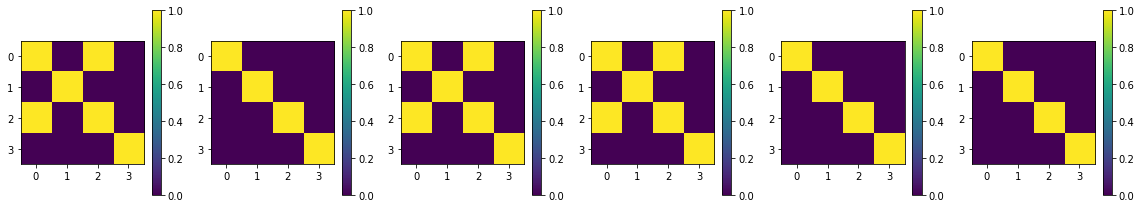

wasm_normal_sub


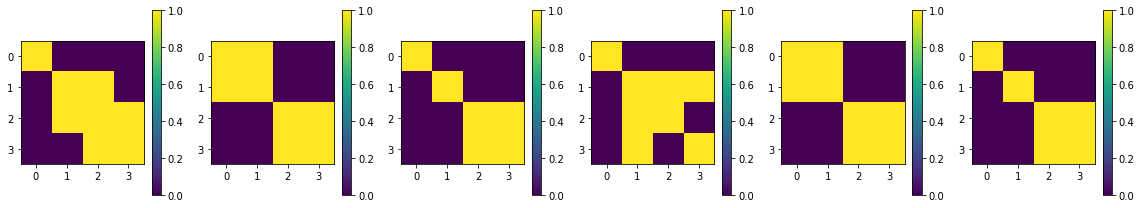

wasm_normal_mul


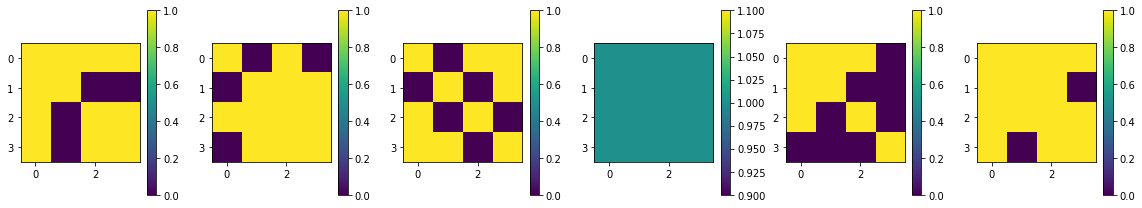

wasm_normal_div


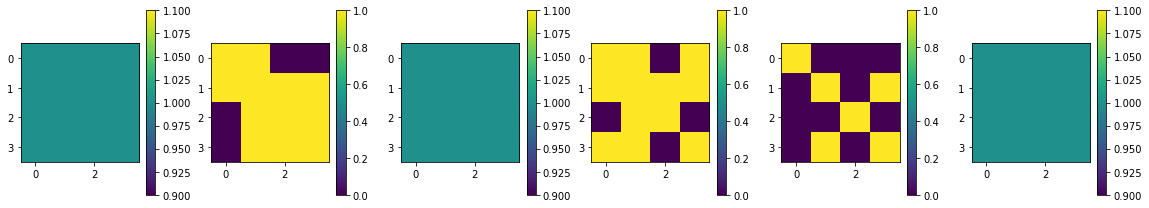

wasm_eager_add


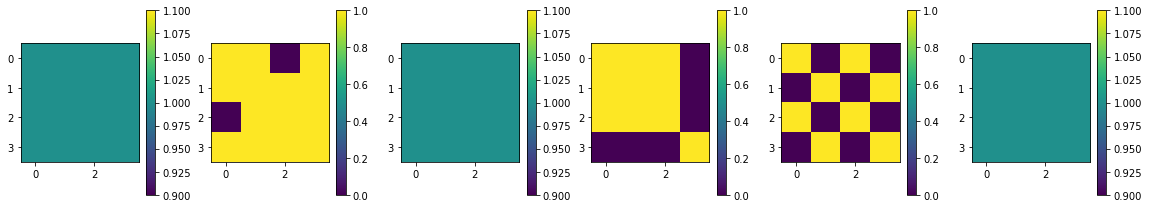

wasm_eager_sub


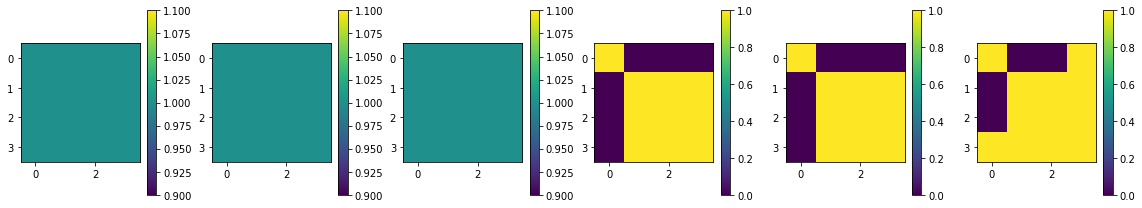

wasm_eager_mul


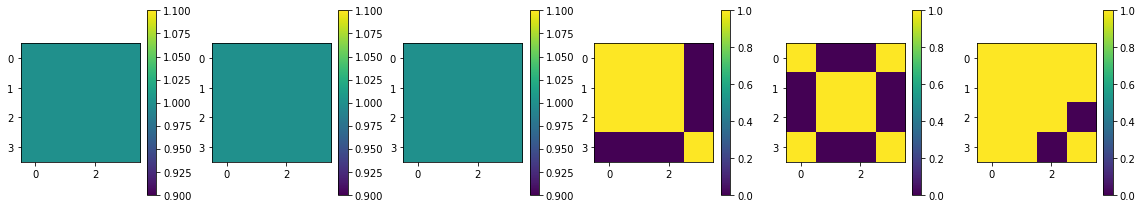

wasm_eager_div


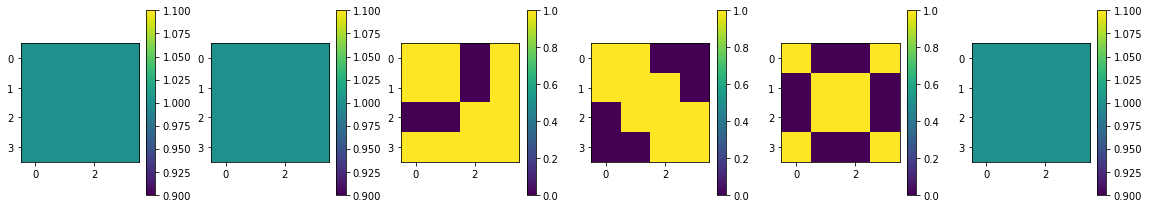

cpu_normal_add


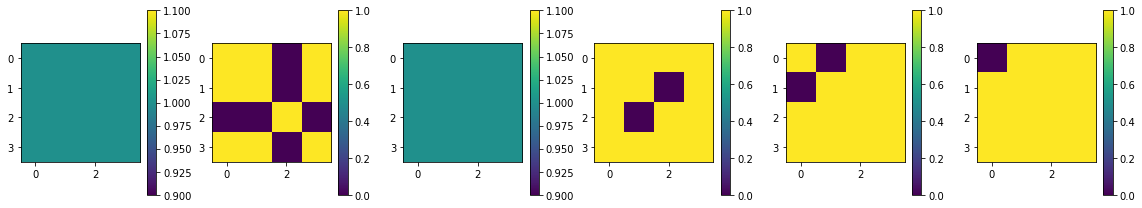

cpu_normal_sub


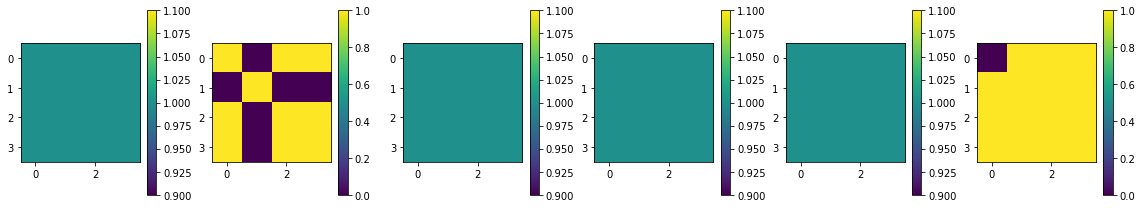

cpu_normal_mul


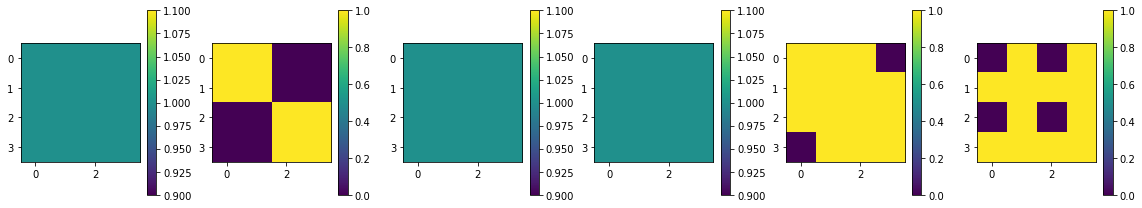

cpu_normal_div


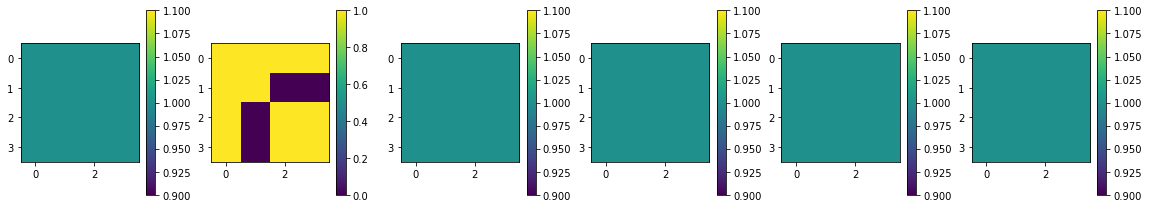

cpu_eager_add


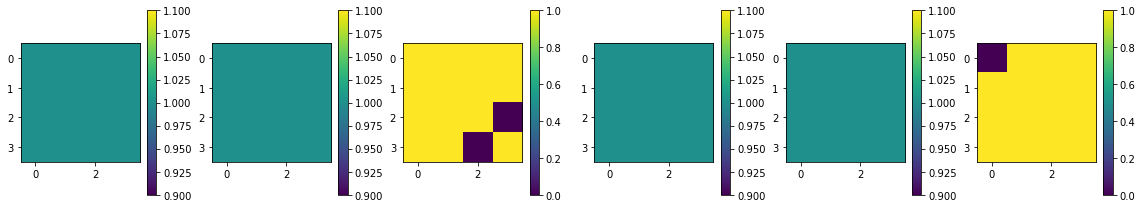

cpu_eager_sub


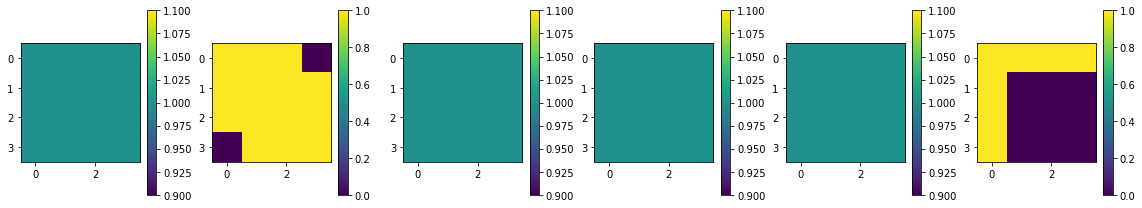

cpu_eager_mul


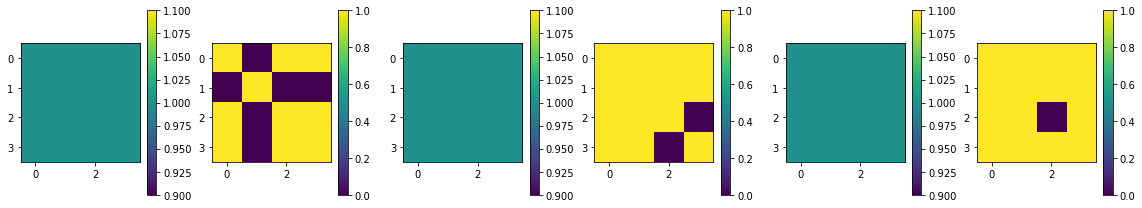

cpu_eager_div


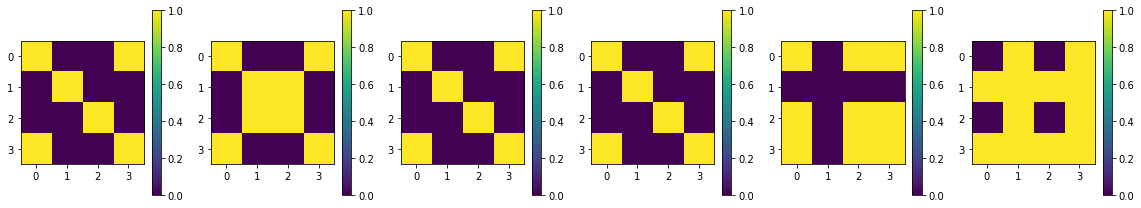

In [334]:
all_times = []
all_times_sim = []
for backend in ["wasm", "cpu"]:
    for mode in ["normal", "eager"]:
        for op in ["add", "sub", "mul", "div"]:
            fig, axs = plt.subplots(1, 6, figsize=(16, 3))
            print(f"{backend}_{mode}_{op}")
            for di, dd in enumerate(["1", "2", "ori", "cache", "sync", "sync_cache"]):
                temp = np.array([np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ff"]),
                        np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ft"]),
                        np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_tf"]),
                        np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_tt"])])
                temp2 = np.array([np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ff"][chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ff_index"]]),
                        np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ft"][chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_ft_index"]]),
                        np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_tf"][chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_tf_index"]]),
                        np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_tt"][chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_tt_index"]])])
                all_times += [len(find_best_set(temp)[0])]
                all_times_sim += [len(find_best_set(temp2)[0])]
                mm = [[stats.ttest_ind(t, y).pvalue>0.05 for y in temp] for t in temp]
                im = axs[di].imshow(mm, interpolation='none')
                plt.colorbar(im, ax=axs[di])
            fig.tight_layout()
            plt.show()
                # plt.imshow(mm)
                # plt.colorbar()
                # plt.show()

(array([ 3.,  0.,  0., 21.,  0.,  0., 20.,  0.,  0., 52.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

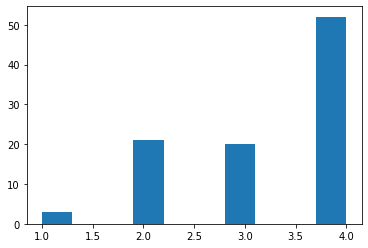

In [335]:
plt.hist(all_times)

(array([ 1.,  0.,  0., 21.,  0.,  0., 27.,  0.,  0., 47.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

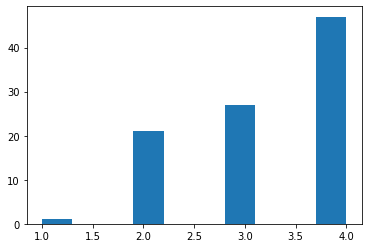

In [336]:
plt.hist(all_times_sim)

In [286]:

stats.ttest_ind(np.concatenate(chrome_data_combine["wasm_normal_add"]["1_ff"][chrome_data_combine["wasm_normal_add"]["1_ff_index"]]),
                np.concatenate(chrome_data_combine["wasm_normal_add"]["1_tf"][chrome_data_combine["wasm_normal_add"]["1_tf_index"]]))

Ttest_indResult(statistic=-5.329260200849635, pvalue=1.1794756723262504e-07)

In [277]:
stats.ttest_ind(np.concatenate(chrome_data_combine["wasm_normal_add"]["1"][chrome_data_combine["wasm_normal_add"]["1_index"]]),
                np.concatenate(edge_data_combine["wasm_normal_add"]["1"][edge_data_combine["wasm_normal_add"]["1_index"]]))

Ttest_indResult(statistic=48.79179964057352, pvalue=0.0)

In [273]:
stats.ttest_ind(np.concatenate(firefox_data_combine["wasm_normal_add"]["1"][firefox_data_combine["wasm_normal_add"]["1_index"]]),
                np.concatenate(firefox_data_combine["wasm_normal_add"]["2"][firefox_data_combine["wasm_normal_add"]["2_index"]]))

Ttest_indResult(statistic=17.062583805888398, pvalue=5.0003644001132256e-64)

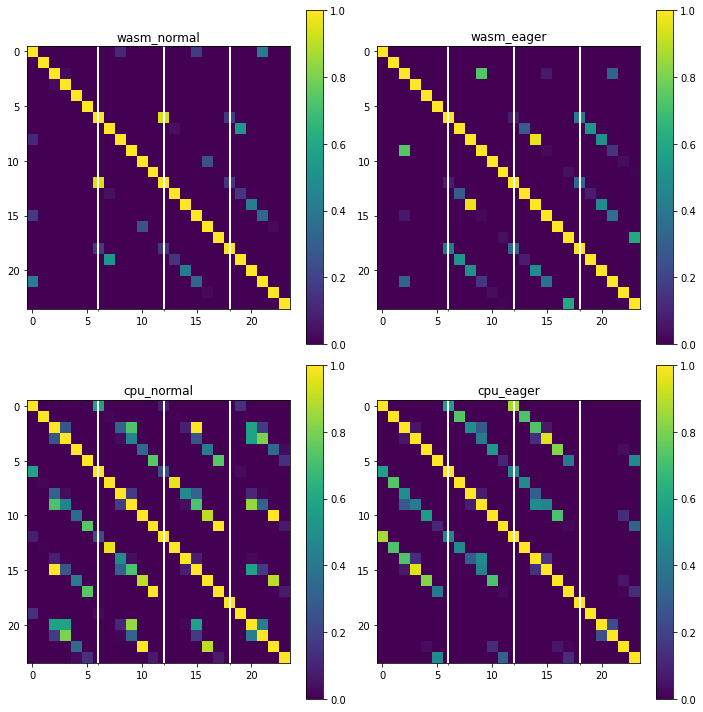

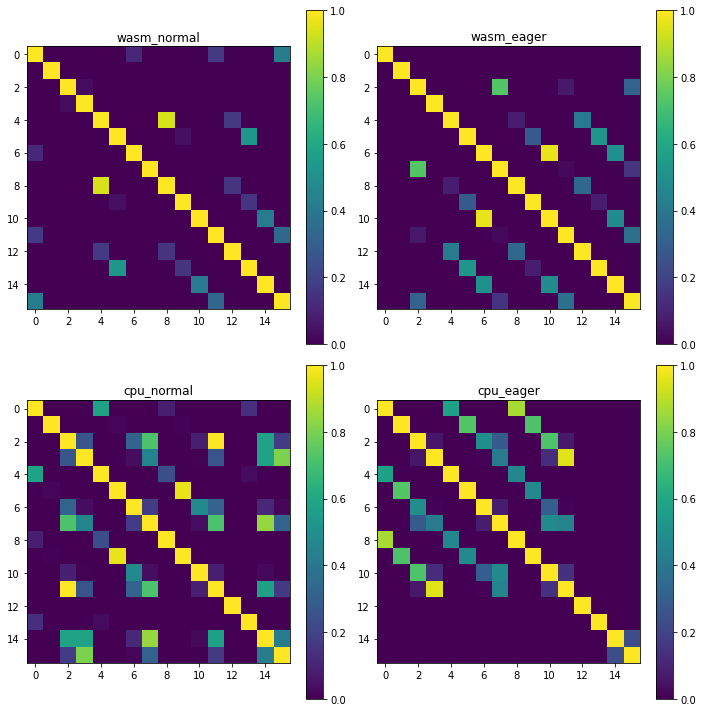

In [369]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for bi, backend in enumerate(["wasm", "cpu"]):
    for mi, mode in enumerate(["normal", "eager"]):
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        
        temp = []
        for opi, op in enumerate(["add", "sub", "mul", "div"]):
            for di, dd in enumerate(["1", "2", "ori", "cache", "sync", "sync_cache"]):
                temp += [np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}"])]
        mm = [[stats.ttest_ind(t, y).pvalue for y in temp] for t in temp]
        im = axs[bi, mi].imshow(mm, interpolation='none')
        plt.colorbar(im, ax=axs[bi, mi])
        fig.tight_layout()
        axs[bi,mi].title.set_text(f"{backend}_{mode}")
        minor_ticks = np.arange(0, 6*4, 6)
        axs[bi, mi].set_xticks(minor_ticks, minor=True)
        axs[bi, mi].set_yticks(minor_ticks, minor=True)
        axs[bi, mi].grid(which="minor", color='w', linewidth=2, )
        # plt.title(f"{backend}_{mode}")
plt.show()
                # plt.imshow(mm)
                # plt.colorbar()
                # plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for bi, backend in enumerate(["wasm", "cpu"]):
    for mi, mode in enumerate(["normal", "eager"]):
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        
        temp = []
        for opi, op in enumerate(["add", "sub", "mul", "div"]):
            for di, dd in enumerate(["1", "2", "ori", "cache"]):
                temp += [np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}"])]
        mm = [[stats.ttest_ind(t, y).pvalue for y in temp] for t in temp]
        im = axs[bi, mi].imshow(mm, interpolation='none')
        plt.colorbar(im, ax=axs[bi, mi])
        fig.tight_layout()
        axs[bi,mi].title.set_text(f"{backend}_{mode}")
        minor_ticks = np.arange(0, 4*4, 4)
        axs[bi, mi].set_xticks(minor_ticks, minor=True)
        axs[bi, mi].set_yticks(minor_ticks, minor=True)
        axs[bi, mi].grid(which="minor", color='w', linewidth=2, )
        # plt.title(f"{backend}_{mode}")
plt.show()
                # plt.imshow(mm)
                # plt.colorbar()
                # plt.show()

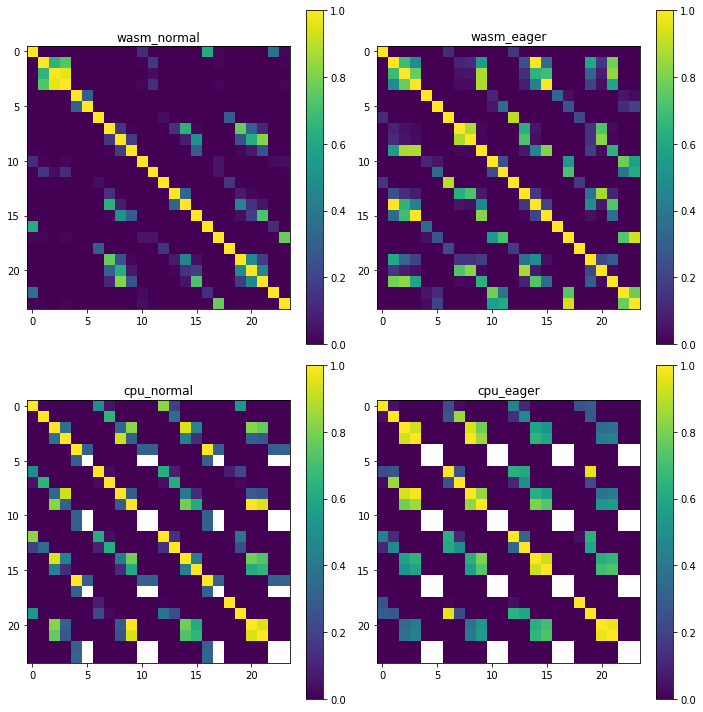

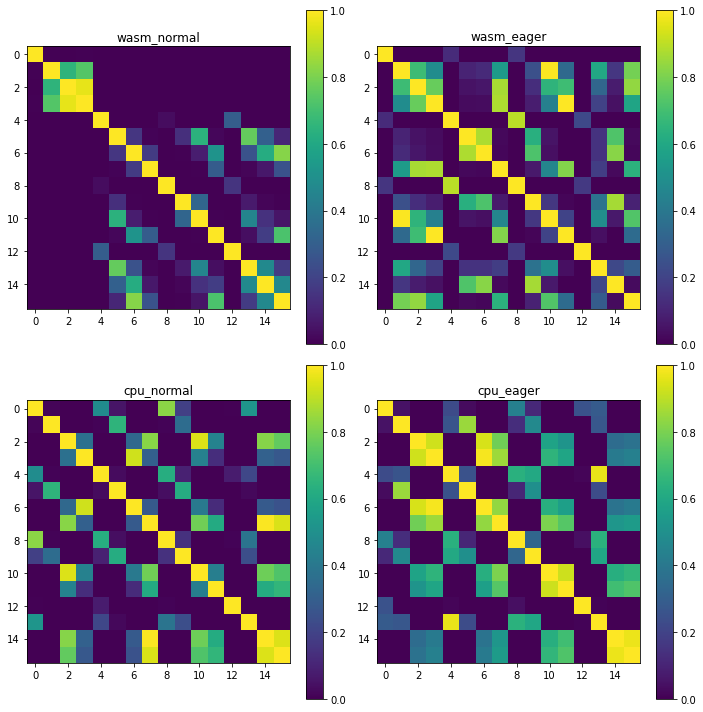

In [366]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for bi, backend in enumerate(["wasm", "cpu"]):
    for mi, mode in enumerate(["normal", "eager"]):
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        
        temp = []
        for opi, op in enumerate(["add", "sub", "mul", "div"]):
            for di, dd in enumerate(["1", "2", "ori", "cache", "sync", "sync_cache"]):
                # temp += [np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}"])]
                temp += [np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}"])[chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_index"]]]
        mm = [[stats.ttest_ind(t, y).pvalue for y in temp] for t in temp]
        im = axs[bi, mi].imshow(mm, interpolation='none')
        plt.colorbar(im, ax=axs[bi, mi])
        fig.tight_layout()
        axs[bi,mi].title.set_text(f"{backend}_{mode}")
        # plt.title(f"{backend}_{mode}")
plt.show()
                # plt.imshow(mm)
                # plt.colorbar()
                # plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for bi, backend in enumerate(["wasm", "cpu"]):
    for mi, mode in enumerate(["normal", "eager"]):
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        
        temp = []
        for opi, op in enumerate(["add", "sub", "mul", "div"]):
            for di, dd in enumerate(["1", "2", "ori", "cache"]):
                # temp += [np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}"])]
                temp += [np.concatenate(chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}"])[chrome_data_combine[f"{backend}_{mode}_{op}"][f"{dd}_index"]]]
        mm = [[stats.ttest_ind(t, y).pvalue for y in temp] for t in temp]
        im = axs[bi, mi].imshow(mm, interpolation='none')
        plt.colorbar(im, ax=axs[bi, mi])
        fig.tight_layout()
        axs[bi,mi].title.set_text(f"{backend}_{mode}")
        # plt.title(f"{backend}_{mode}")
plt.show()
                # plt.imshow(mm)
                # plt.colorbar()
                # plt.show()

In [66]:
stats.ttest_ind(np.array(edge_data_all["wasm_normal_add_false_false"]["sync"]+
                         edge_data_all["wasm_normal_add_false_true"]["sync"]+
                         edge_data_all["wasm_normal_add_true_false"]["sync"]+
                         edge_data_all["wasm_normal_add_true_true"]["sync"]),
                np.array(edge_data_all["wasm_normal_sub_false_false"]["sync"]+
                         edge_data_all["wasm_normal_sub_false_true"]["sync"]+
                         edge_data_all["wasm_normal_sub_true_false"]["sync"]+
                         edge_data_all["wasm_normal_sub_true_true"]["sync"]))

Ttest_indResult(statistic=-4.157569387227592, pvalue=3.250431438144816e-05)

In [71]:
ztest(np.array(edge_data_all["wasm_normal_add_false_false"]["sync"]+
                         edge_data_all["wasm_normal_add_false_true"]["sync"]+
                         edge_data_all["wasm_normal_add_true_false"]["sync"]+
                         edge_data_all["wasm_normal_add_true_true"]["sync"]),
                np.array(edge_data_all["wasm_normal_sub_false_false"]["sync"]+
                         edge_data_all["wasm_normal_sub_false_true"]["sync"]+
                         edge_data_all["wasm_normal_sub_true_false"]["sync"]+
                         edge_data_all["wasm_normal_sub_true_true"]["sync"]))

(-4.157569387227592, 3.21651594896668e-05)

(array([ 32., 558., 145., 162.,  34.,  43.,  13.,   1.,   1.,   1.]),
 array([10. , 11.6, 13.2, 14.8, 16.4, 18. , 19.6, 21.2, 22.8, 24.4, 26. ]),
 <BarContainer object of 10 artists>)

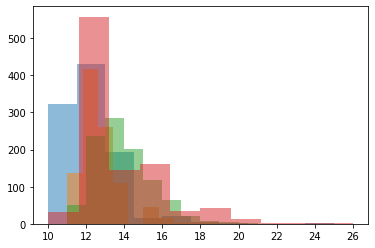

In [33]:
plt.hist(np.array(chrome_data_all["wasm_normal_add_true_true"]["sync"]), alpha=.5)
plt.hist(np.array(chrome_data_all["wasm_normal_add_false_true"]["sync"]), alpha=.5)
plt.hist(np.array(chrome_data_all["wasm_normal_add_true_false"]["sync"]), alpha=.5)
plt.hist(np.array(chrome_data_all["wasm_normal_add_false_false"]["sync"]), alpha=.5)


(array([791., 780., 154., 162.,  34.,  43.,  13.,   1.,   1.,   1.]),
 array([10. , 11.6, 13.2, 14.8, 16.4, 18. , 19.6, 21.2, 22.8, 24.4, 26. ]),
 <BarContainer object of 10 artists>)

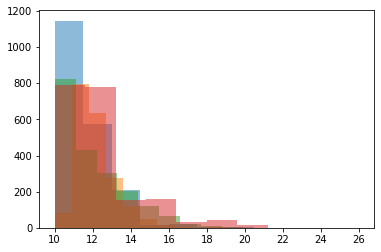

In [34]:
plt.hist(np.array(chrome_data_all["wasm_normal_add_true_true"]["sync"]+
                  chrome_data_all["wasm_normal_sub_true_true"]["sync"]), alpha=.5)
plt.hist(np.array(chrome_data_all["wasm_normal_add_false_true"]["sync"]+
                  chrome_data_all["wasm_normal_sub_false_true"]["sync"]), alpha=.5)
plt.hist(np.array(chrome_data_all["wasm_normal_add_true_false"]["sync"]+
                  chrome_data_all["wasm_normal_sub_true_false"]["sync"]), alpha=.5)
plt.hist(np.array(chrome_data_all["wasm_normal_add_false_false"]["sync"]+
                  chrome_data_all["wasm_normal_sub_false_false"]["sync"]), alpha=.5)

(array([4.420e+02, 2.521e+03, 8.760e+02, 1.020e+02, 1.500e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 10 artists>)

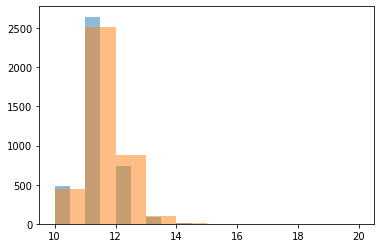

In [54]:
plt.hist(np.array(edge_data_all["wasm_normal_add_false_false"]["sync"]+
                    edge_data_all["wasm_normal_add_false_true"]["sync"]+
                    edge_data_all["wasm_normal_add_true_false"]["sync"]+
                    edge_data_all["wasm_normal_add_true_true"]["sync"]), alpha=.5)
plt.hist(np.array(edge_data_all["wasm_normal_sub_false_false"]["sync"]+
                    edge_data_all["wasm_normal_sub_false_true"]["sync"]+
                    edge_data_all["wasm_normal_sub_true_false"]["sync"]+
                    edge_data_all["wasm_normal_sub_true_true"]["sync"]), alpha=.5)